(Placeholder for your name)

(Placeholder for your i-number)

# Data Analysis

# Clinic1: Exploratory Data Analysis

## DELIVERABLES (DEADLINE 21/February late night, wildcards possible)

Instructions for the deliverable: 

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

* Honor code applies to these tasks. Only individual work should be submitted.

* Data science is a collaborative activity. While you may talk with others about the clinic, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

* It is mandatory to list and disclose any website (or other resource) you used (e.g. stackoverflow) as well as any genAI tools (e.g. chatGPT) used.

**Collaborators**: *list collaborators here*

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

### Learning goals

By completing and delivering the clinic tasks you will know how to :

* Load files and check their integrity
* Identifying the type of data collected, missing values, anomalies, etc.
* Wrangle data for analysis
* Parse columns in the dataframe to create new dataframe columns
* Use EDA to learn more about your data
* Create and interpret informative visualizations to explore the data set
* Derive meaningful insights for the societal impact of datasets

## 0: Introduction to the Problem

The Product Safety Alerts page (https://ec.europa.eu/safety-gate-alerts/screen/search?resetSearch=true) of the European Commission (EC) serves as a vital resource for consumers, businesses, and authorities across the European Union (EU). This platform provides up-to-date information on products that pose risks to consumers' health and safety, thereby facilitating prompt action to mitigate potential hazards.

Some key features and functions of the Product Safety Alerts page include:

**Alert Notifications**: The page regularly publishes alerts regarding unsafe products circulating within the EU market. These alerts cover a wide range of products, including toys, electrical appliances, cosmetics, and household goods.

**Identification of Risks**: Each alert details the specific risks associated with the identified products, such as potential choking hazards, chemical contamination, or electrical malfunctions.

**Product Details**: The alerts include information about the product brand, model, and description, enabling consumers to identify and avoid purchasing or using the affected items.

**Recommended Actions**: The EC provides guidance on recommended actions for consumers, retailers, and authorities, such as discontinuing product use, recalling items from the market, and implementing corrective measures.

**Reporting Mechanisms**: The page offers convenient reporting mechanisms for consumers and businesses to notify authorities about unsafe products or incidents, facilitating swift response and resolution.

**Archived Alerts**: Previous alerts remain accessible on the page, allowing users to review historical data and trends related to product safety issues within the EU market.

Overall, the Product Safety Alerts page of the EC plays a crucial role in promoting consumer awareness, facilitating product recalls, and safeguarding public health and safety across the European Union. By providing transparent and timely information, this platform empowers stakeholders to take proactive measures to address product safety concerns effectively.

Make sure to navigate the webpage to gather all information you need about the context of the problem and the dataset.

In this clinic, you will perform tasks to clean, visualize, and explore historical data from alerts and come up with insights (as well as with improvements on the data schema). You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

### 0.1 A note on the basic EDA workflow

Before we move to the actual clinic tasks, a reminder about the basic EDA workflow:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

### 0.2 Grading

The clinic is broken down to several sub-questions so that they help you solve the tasks in an iterative way but also to facilitate grading. 

For responses that require numerical answers and some comment/discussion (free response), readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, you should abide to the basic principles as we have discussed in class. Note that for ALL plotting questions from here on out (also for other clinics), we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


### Score breakdown per sub-question

Question | Points
--- | ---
Question 1a | 3
Question 1b | 3
Question 1c | 3
Question 2a | 3
Question 2b | 3
Question 3a | 4
Question 3b | 4
Question 4a | 4
Question 4b | 4
Question 5  | 4
Total | 35

Your final score out of 35 will be scaled down to 1 and be your final grade for this clinic.

---
## 1: Data Preparation

The data we are exploring contains 35529 entries which covers all alerts logged in the safety gate portal since 01/01/2010. 

Easter Egg: How many entries does Safety Gate portal has in total? 

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
Type of Alert | Selection of : serious risk, other risk levels, other types of alerts
Type	|	Whether it concerns consumer or professional (e.g. b2b)
Alert number	|	Unique identifier about every alert (it has the structure dddd/yy or Add/ddddd/yy where 'd' means a digit and 'yy' refers to the year that the alert was logged, i.e. 10 means 2010, 22 means 2022) 
Alert submitted by	|	Country that submitted the alert (includes the EU countries + EFTA countries e.g. Iceland)
Country of origin	|	Country of origin for the product
Counterfeit	|	Is the product counterfeit? Selectin of: yes, no, unknown
Risk type	|	What is the possible risk?
Risk legal provision	|	What legal provisions does the product violate?
Product	|	Decsription of product
Name	|	Product name
Description	|	Detailed description of the product functioning
Brand	|	Brand Name
Category	|	Broad category of the product (should include 33 big categories plus category others which can have sub-categories, e.g. Other-Ladder, Other-Clothing Accessories)
Type / number of model	|	Specific serial or number or type 
OECD Portal category	|	Does the product correspond to OECD category?
Risk	|	Detailed description of the risk 
Compulsory measures	|	Measures taken that are compulsory
Voluntary measures	|	Measures taken that are voluntary
Products were found and measures were taken also in	|	In which other countries the product was found. Countries can be listed with ","
Company recall page	|	If the product was recalled, has this been published?
URL of Case	|	URL of the Safety Gate
Barcode	|	The barcode of the product (if applicable)
Batch number	|	Batch number of the product (if applicable)
Packaging description	|	How the items is packaged (e.g. wrapped in plastic etc.) (if applicable)

The following code loads the data into a Pandas ``DataFrame``.

In [1]:
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#change accordingly if needed
file_path = 'all_alerts.xlsx'

# Use pd.read_excel() to read the Excel file into a pandas DataFrame.
df = pd.read_excel(file_path)

In [3]:
df.head(10)

Type of alert      Type Alert number Alert submitted by  \
0  Serious risk  Consumer      1968/10             Greece   
1  Serious risk  Consumer      1953/10            Germany   
2  Serious risk  Consumer      1946/10             France   
3  Serious risk  Consumer      1945/10           Bulgaria   
4  Serious risk  Consumer      1888/10            Belgium   
5  Serious risk  Consumer      1884/10             Sweden   
6  Serious risk  Consumer      1848/10            Czechia   
7  Serious risk  Consumer      1847/10              Spain   
8  Serious risk  Consumer      1842/10             Greece   
9  Serious risk  Consumer      1833/10            Finland   

            Country of origin Counterfeit           Risk type  \
0                       Italy          No            Chemical   
1  People's Republic of China          No            Chemical   
2  People's Republic of China          No            Chemical   
3                     Türkiye          No            Injuries   
4             The Netherlands          No            Injuries   
5                      Sweden          No            Injuries   
6                      Poland          No  Chemical, Injuries   
7  People's Republic of China          No            Chemical   
8  People's Republic of China          No   Choking, Injuries   
9  People's Republic of China          No            Chemical   

  Risk legal provision                                      Product Name  ...  \
0                  NaN                     Soother (Physiosoft)\n\n  NaN  ...   
1                  NaN                   Baby shoes (Baby shoe)\n\n  NaN  ...   
2                  NaN  Glue (4 tubes de colle cyanocrylate 2g)\n\n  NaN  ...   
3                  NaN                  Baby-walker (Discovery)\n\n  NaN  ...   
4                  NaN                                   High chair  NaN  ...   
5                  NaN                  Pushchair - Brio Duette\n\n  NaN  ...   
6                  NaN                            Pram - Fast Rider  NaN  ...   
7                  NaN                            Air freshener\n\n  NaN  ...   
8                  NaN                                  Baby walker  NaN  ...   
9                  NaN        1. Nursing pillow, 2. Crib bumper\n\n  NaN  ...   

  OECD Portal category                                               Risk  \
0                  NaN  The product poses a chemical risk because it c...   
1                  NaN  The product poses a chemical risk because the ...   
2                  NaN  The product poses a chemical risk because it c...   
3                  NaN  The product poses a risk of injuries to small ...   
4                  NaN  The product poses a risk of injuries because t...   
5                  NaN  The product poses a risk of injuries because t...   
6                  NaN  The product poses a risk of injuries due to th...   
7                  NaN  The product poses a chemical risk because it c...   
8                  NaN  The product poses a risk of choking due to the...   
9                  NaN  The products pose a chemical risk and an envir...   

                                 Compulsory measures  \
0  Type of economic operator to whom the measure(...   
1  Type of economic operator to whom the measure(...   
2                                                NaN   
3  Type of economic operator to whom the measure(...   
4                                                NaN   
5                                                NaN   
6  Type of economic operator to whom the measure(...   
7  Type of economic operator to whom the measure(...   
8  Type of economic operator to whom the measure(...   
9                                                NaN   

                                  Voluntary measures  \
0                                                NaN   
1                                                NaN   
2  Type of economic operator taking notified meas...   
3                                

Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [3]:
df.shape

(35529, 24)

## Question 1a (First observations)

Develop a feeling for the dataset. Check how many variables we have, what type of variables they are (quantitative/categorical).

Inspect the following variables: ``Type of alert``, ``Alert submitted by``, ``Risk type``, ``Counterfeit``, ``Company recall page`` and check their distributions. Report your findings both with a plot but also with numbers/verbal evidence (e.g. "99% of column "X" contain the value "Jerry"", accompanied with an appropriate plot).

Do the same procedure for 3 more variables of your choice. Pick variables that are interesting in your opinion.

In [3]:
###code for 1a goes here

# intution here is simple, i just wrote a function to make the dataframes automatically, they get stored to global q1a_dfs

q1a_dfs = {} # dict to store dataframes from my function

def value_counts_to_df(*args): # pass in df columns as args, returns dataframe for plotting purposes
    global q1a_dfs # dictionary to store dataframes, key is the name of variables, value is the df
    for arg in args:           # *args make this quite modular for future exercices or for EDA
        # first define a couple of variables for each dataframe
        df_name = "df_" + arg.name.replace(" ", "_").lower() # generates name of df
        df_col0_name = arg.name.replace(" ", "_").lower() # name for column 0
        arg_vcount = arg.value_counts()
        arg_freq = arg.value_counts() / len(arg)
        
        # "build" the dataframe for each variable of interest in args
        q1a_dfs[df_name] = pd.DataFrame({df_col0_name : arg_vcount.index,
                               "count" : arg_vcount.values,
                               "frequency" : arg_freq.values})

# calling the function, passing several columns of df
# I have chosen 3 additional variables "type", "country of origin", "type of alert"
value_counts_to_df(df['Alert number'], 
                   df['Alert submitted by'], 
                   df['Risk type'], 
                   df['Counterfeit'], 
                   df['Company recall page'],
                   df['Type'],
                   df['Country of origin'],
                   df['Type of alert'],
                   df['Risk'],
                   df['Compulsory measures'],
                   df['Voluntary measures'],
                   df['Packaging description']
                   )

# now we can also use the dictionary above to make plots using the dataframes we generated

In [6]:
### ALERT NUMBER ###

q1a_dfs['df_alert_number']

# there are 2 duplicate rows, namely alert number "0259/06" and "0145/07"

alert_number  count  frequency
0          0259/06      2   0.000056
1          0145/07      2   0.000056
2          0389/08      1   0.000028
3          0366/08      1   0.000028
4          0365/08      1   0.000028
...            ...    ...        ...
35522      0642/07      1   0.000028
35523      0643/07      1   0.000028
35524      0646/07      1   0.000028
35525      0657/07      1   0.000028
35526      0034/05      1   0.000028

[35527 rows x 3 columns]

Text(0, 0.5, 'Country')

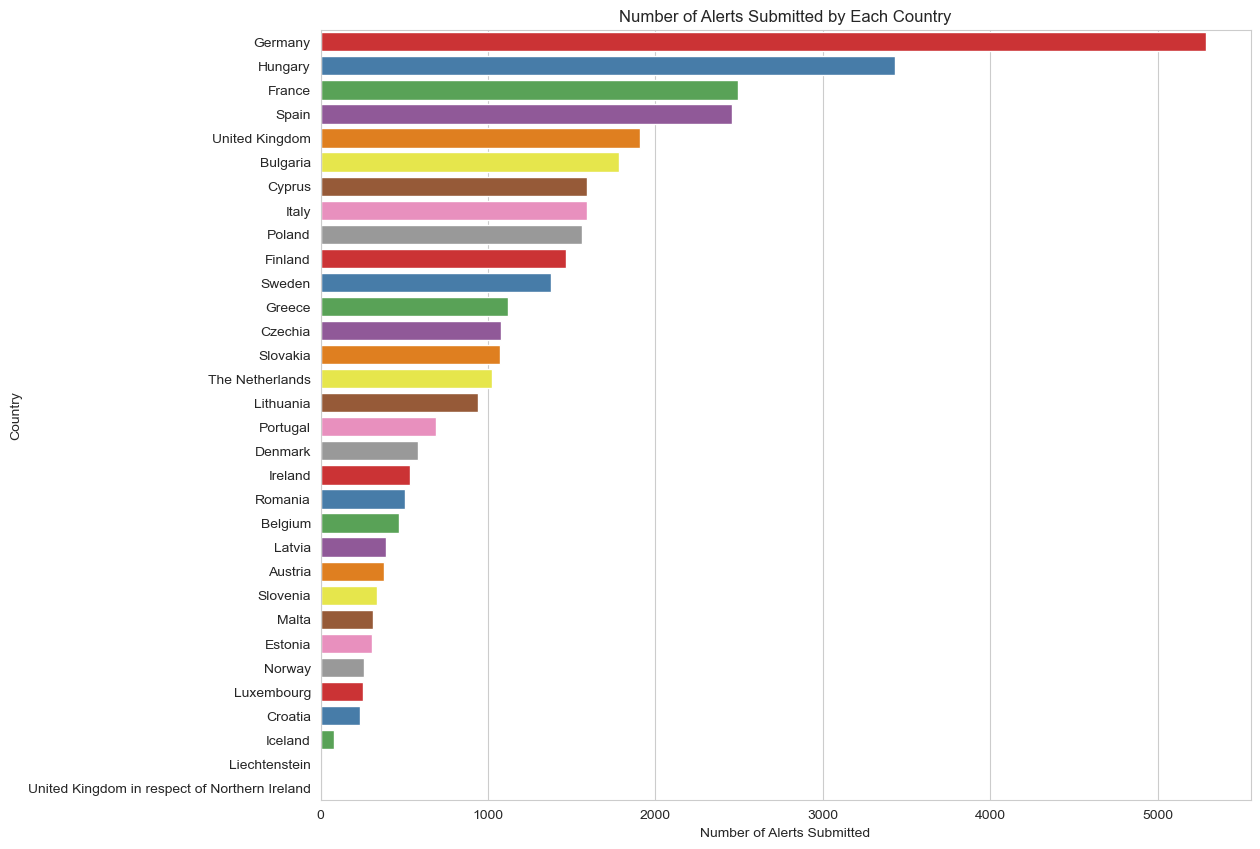

In [13]:
### ALERT SUBMITTED BY ###
# we will either choose to go with a vertical or horizontal bar plot in this case, as opposed to pie charts for example (bar chart more clear)
# horizontal makes more sense in terms of space on the screen

sns.set_style("whitegrid")
plt.figure(figsize = (12, 10))
sns.barplot(y = q1a_dfs["df_alert_submitted_by"].alert_submitted_by, 
            x = q1a_dfs["df_alert_submitted_by"]['count'],
            orient = 'h',
            palette = 'Set1')
plt.title("Number of Alerts Submitted by Each Country")
plt.xlabel("Number of Alerts Submitted")
plt.ylabel("Country")

Text(0, 0.5, 'Type of Risk')

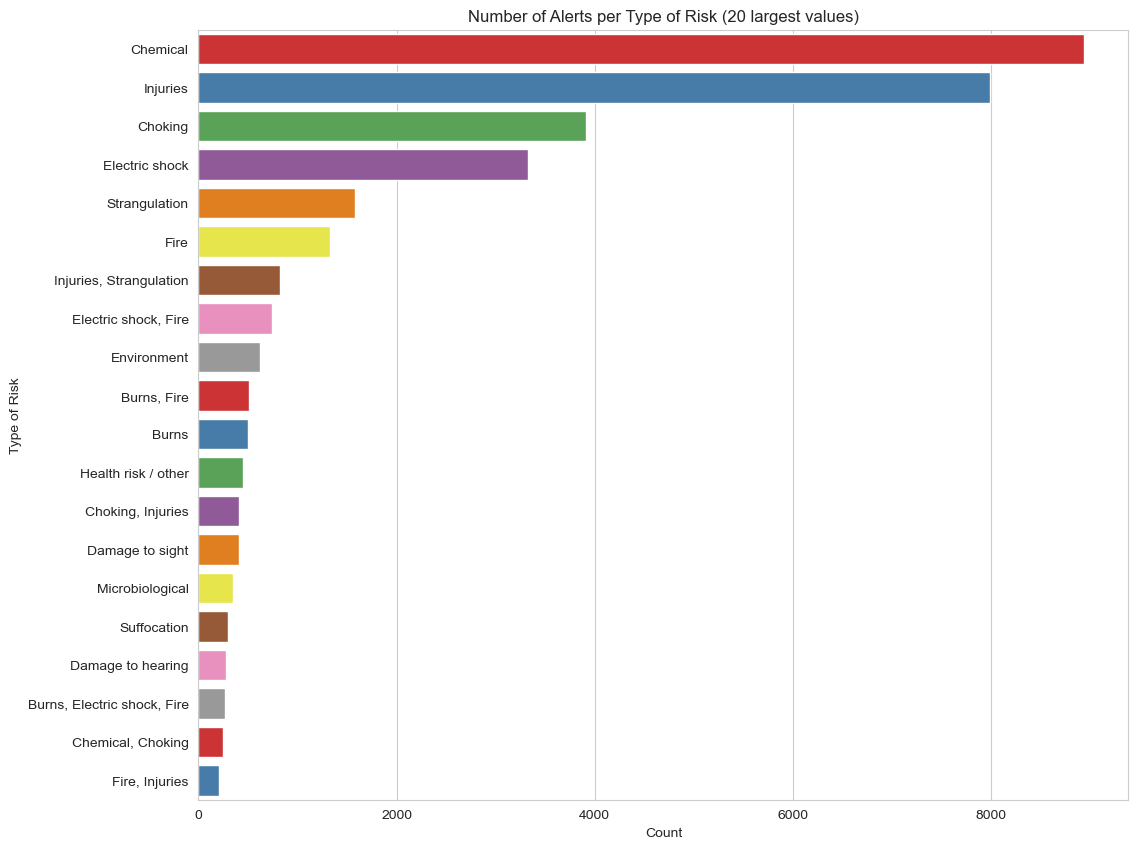

In [90]:
### RISK TYPE ###
# there are so many different values this can take on, I decided to take the top 20 only

top_15_risk_type = q1a_dfs['df_risk_type'].nlargest(20, 'count') # nlargest method takes top n of df

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
sns.barplot(data = top_15_risk_type,
            x = 'count',
            y = 'risk_type',
            orient = 'h',
            palette= 'Set1')
plt.title("Number of Alerts per Type of Risk (20 largest values)")
plt.xlabel("Count")
plt.ylabel("Type of Risk")

Text(0.5, 0, 'Counterfeit Status')

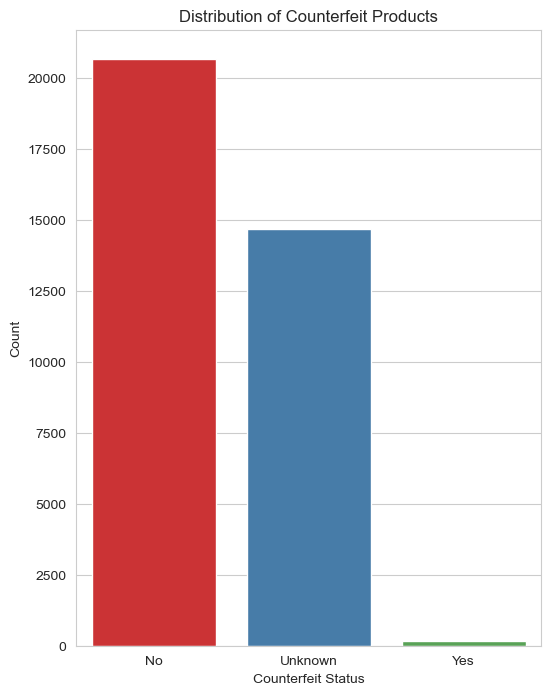

In [95]:
### COUNTERFEIT ###
# can take on unknown value, which seems to be prevalent, no use in infering any values here

sns.set_style("whitegrid")
plt.figure(figsize=(6, 8))
sns.barplot(y = q1a_dfs['df_counterfeit']['count'],
            x = q1a_dfs['df_counterfeit'].counterfeit,
            palette = 'Set1')
plt.title("Distribution of Counterfeit Products")
plt.ylabel("Count")
plt.xlabel("Counterfeit Status")

Text(0, 0.5, 'Company URL')

/Applications/anaconda3/envs/datasci/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Applications/anaconda3/envs/datasci/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


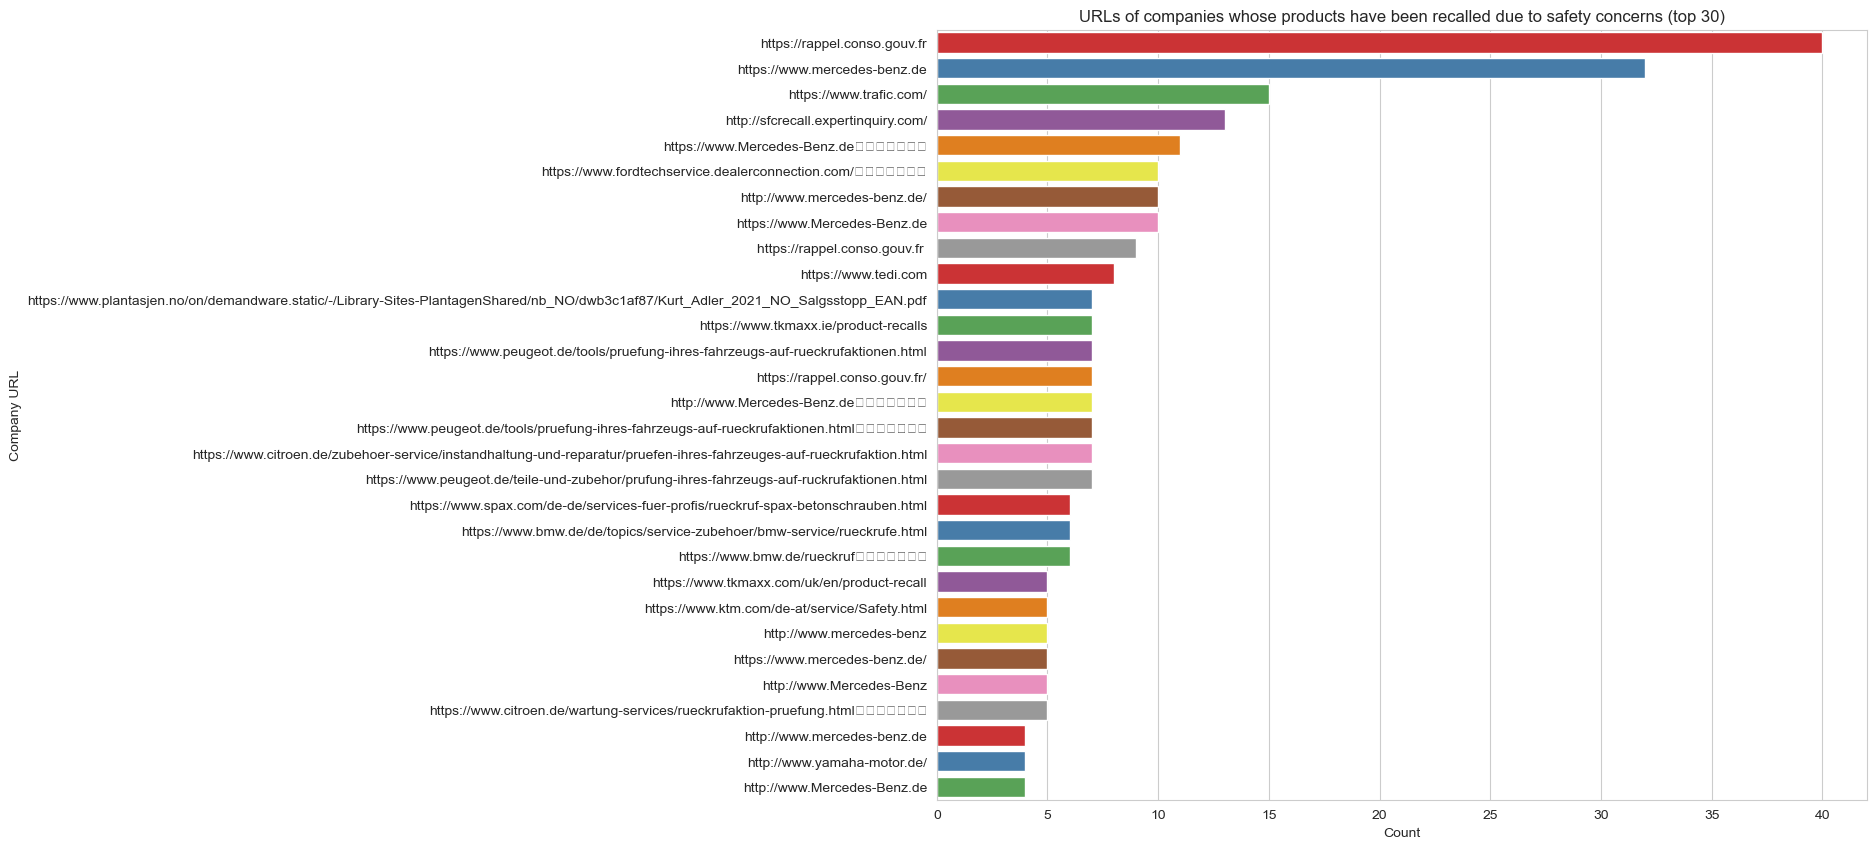

In [105]:
### COMPANY RECALL PAGE ###
# already some issues with the URLs here

sns.set_style("whitegrid")
plt.figure(figsize = (12, 10))
top_30 = q1a_dfs['df_company_recall_page'].nlargest(30, 'count')
sns.barplot(data = top_30,
            x = 'count',
            y = 'company_recall_page',
            orient = 'h',
            palette = 'Set1')
plt.title("URLs of companies whose products have been recalled due to safety concerns (top 30)")
plt.xlabel("Count")
plt.ylabel("Company URL")

Text(0, 0.5, 'Number of Alerts')

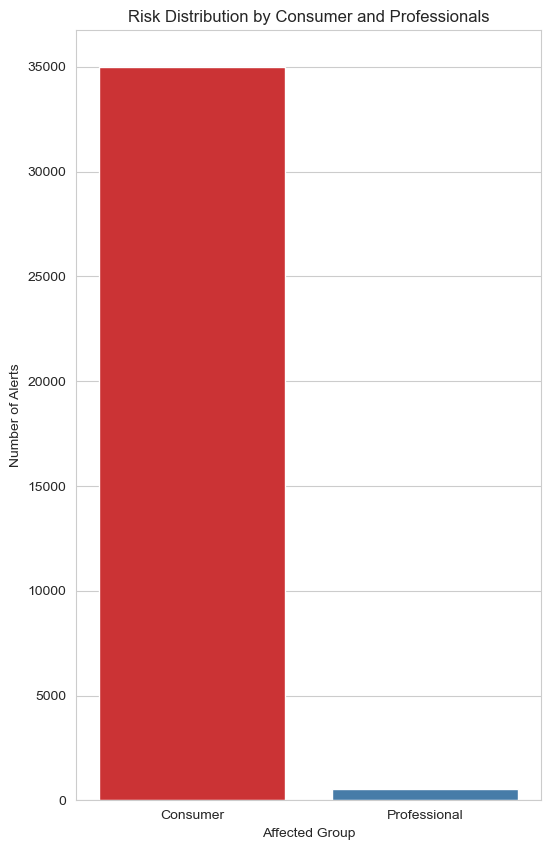

In [126]:
### TYPE ###

sns.set_style("whitegrid")
plt.figure(figsize = (6, 10))
sns.barplot(y = q1a_dfs['df_type']['count'],
            x = q1a_dfs['df_type'].type,
            orient = 'v',
            palette = 'Set1')
plt.title("Risk Distribution by Consumer and Professionals")
plt.xlabel("Affected Group")
plt.ylabel("Number of Alerts")

country_of_origin  count  frequency
0   People's Republic of China  18786   0.528751
1                      Unknown   3328   0.093670
2                      Germany   2106   0.059276
3                        Italy   1303   0.036674
4                       France   1086   0.030567
5                      Türkiye   1044   0.029384
6                United States    976   0.027471
7               United Kingdom    632   0.017788
8                       Poland    613   0.017254
9                        Japan    591   0.016634
10                       Spain    498   0.014017
11                       India    377   0.010611
12                      Taiwan    260   0.007318
13             The Netherlands    250   0.007037
14                   Hong Kong    234   0.006586
15                      Sweden    227   0.006389
16                     Czechia    201   0.005657
17           Republic of Korea    184   0.005179
18                      Greece    171   0.004813
19                    Bulgaria    167   0.004700
20                    Thailand    165   0.004644
21                    Pakistan    155   0.004363
22                     Austria    150   0.004222
23                     Belgium    148   0.004166
24                     Hungary    125   0.003518
25                 Ivory Coast    120   0.003378
26                    Portugal    107   0.003012
27                     Romania     95   0.002674
28                     Vietnam     93   0.002618
29                  Bangladesh     88   0.002477

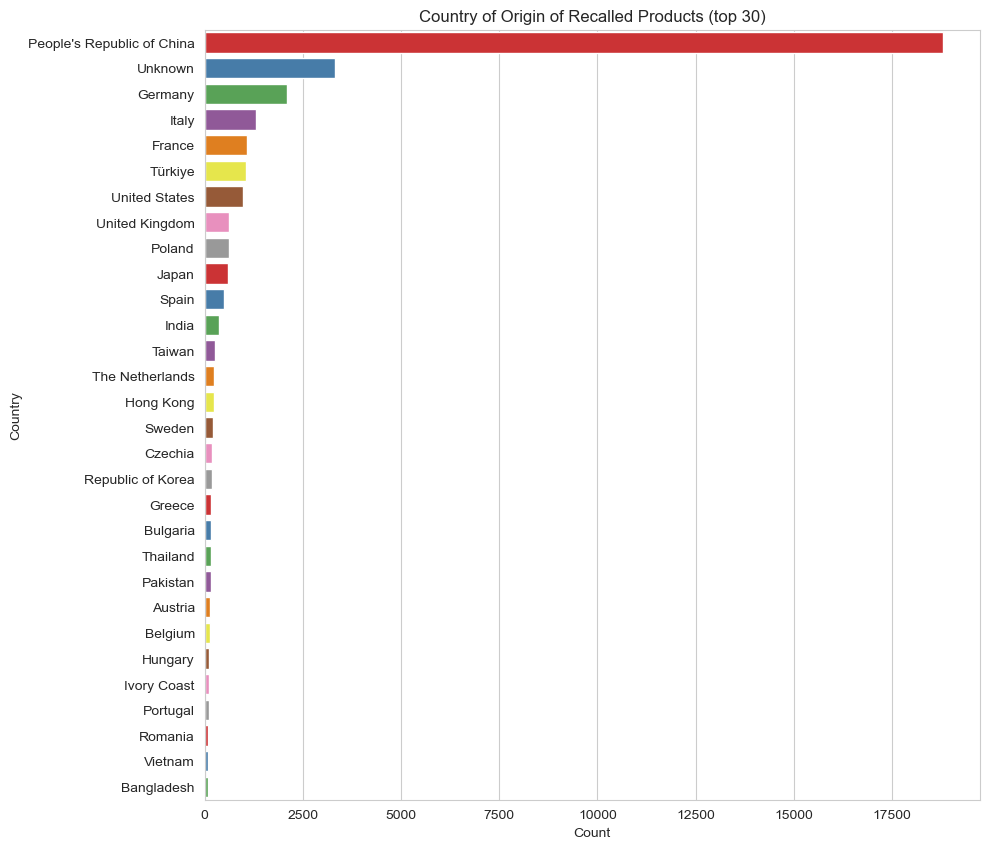

In [133]:
### COUNTRY OF ORIGIN ###

top_30 = q1a_dfs['df_country_of_origin'].nlargest(30, 'count')

sns.set_style("whitegrid")
plt.figure(figsize = (10, 10))
sns.barplot(data = top_30,
            x = 'count',
            y = 'country_of_origin',
            orient = 'h',
            palette = 'Set1')
plt.title("Country of Origin of Recalled Products (top 30)")
plt.xlabel("Count")
plt.ylabel("Country")

top_30

Text(0, 0.5, 'Count')

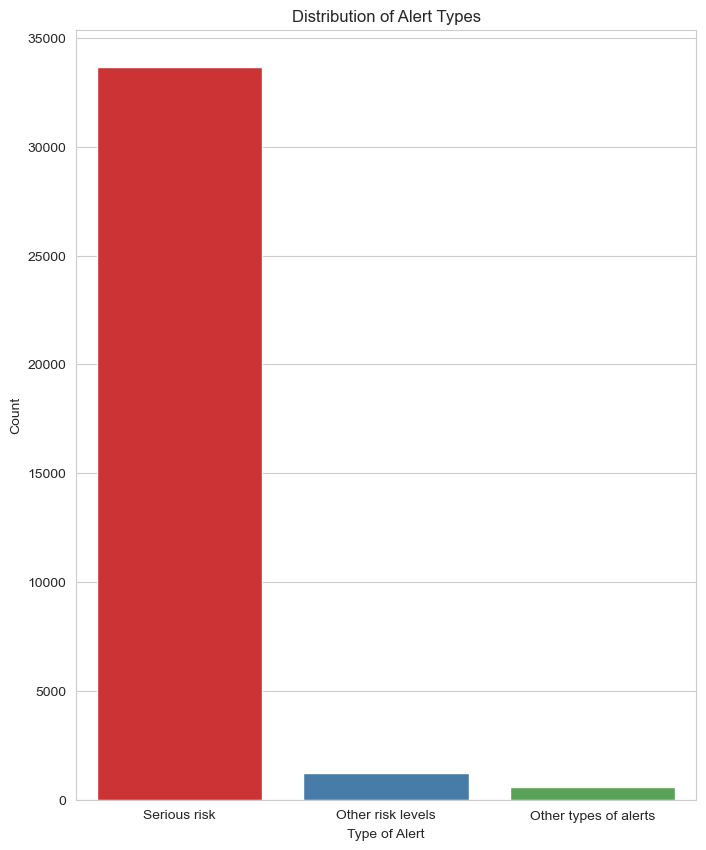

In [137]:
## TYPE OF ALERT ##

q1a_dfs['df_type_of_alert']

sns.set_style("whitegrid")
plt.figure(figsize = (8, 10))
sns.barplot(y = q1a_dfs['df_type_of_alert']['count'],
            x = q1a_dfs['df_type_of_alert'].type_of_alert,
            palette = 'Set1')
plt.title("Distribution of Alert Types")
plt.xlabel("Type of Alert")
plt.ylabel("Count")

**QUESTION 1A : ANSWER**

__ALERT NUMBER__

This variable is not a quantitative variable, it is categorical, but unique to each of the ~30k rows. No insights can be derived from this variable, therefore no plot is needed here.

!! Additionally, alert numbers "0259/06" and "0145/07" occur twice in the dataset, they are duplicate rows.

__ALERTS SUBMITTED BY COUNTRY__

The graph for this variable is a __horizontal bar plot__. The reason behind this choice is simple, Countries are categorical variables, and all we are interested in plotting is the number of alerts submitted by each country. The reason why I went with horizontal instead of vertical is simply because there is not enough space to display all the information of the graph on the screen.

Regarding the number of alerts submitted by each country, Germany is the leader, with 5290 alerts submitted
                                                          Hungary is the close second with 3432 alerts submitted
                                                          France is the third, with 2943 alerts submitted

One interesting remark here is that Hungary is only second, despite having 8 times less inhabitants than Germany. Now, this may not imply anything, maybe their government is more reactive to bad products, but it may also be the case that they have poor regulations regarding imports of products, and this may be the cause for the high amount of alerts submitted compared to France and Germany.

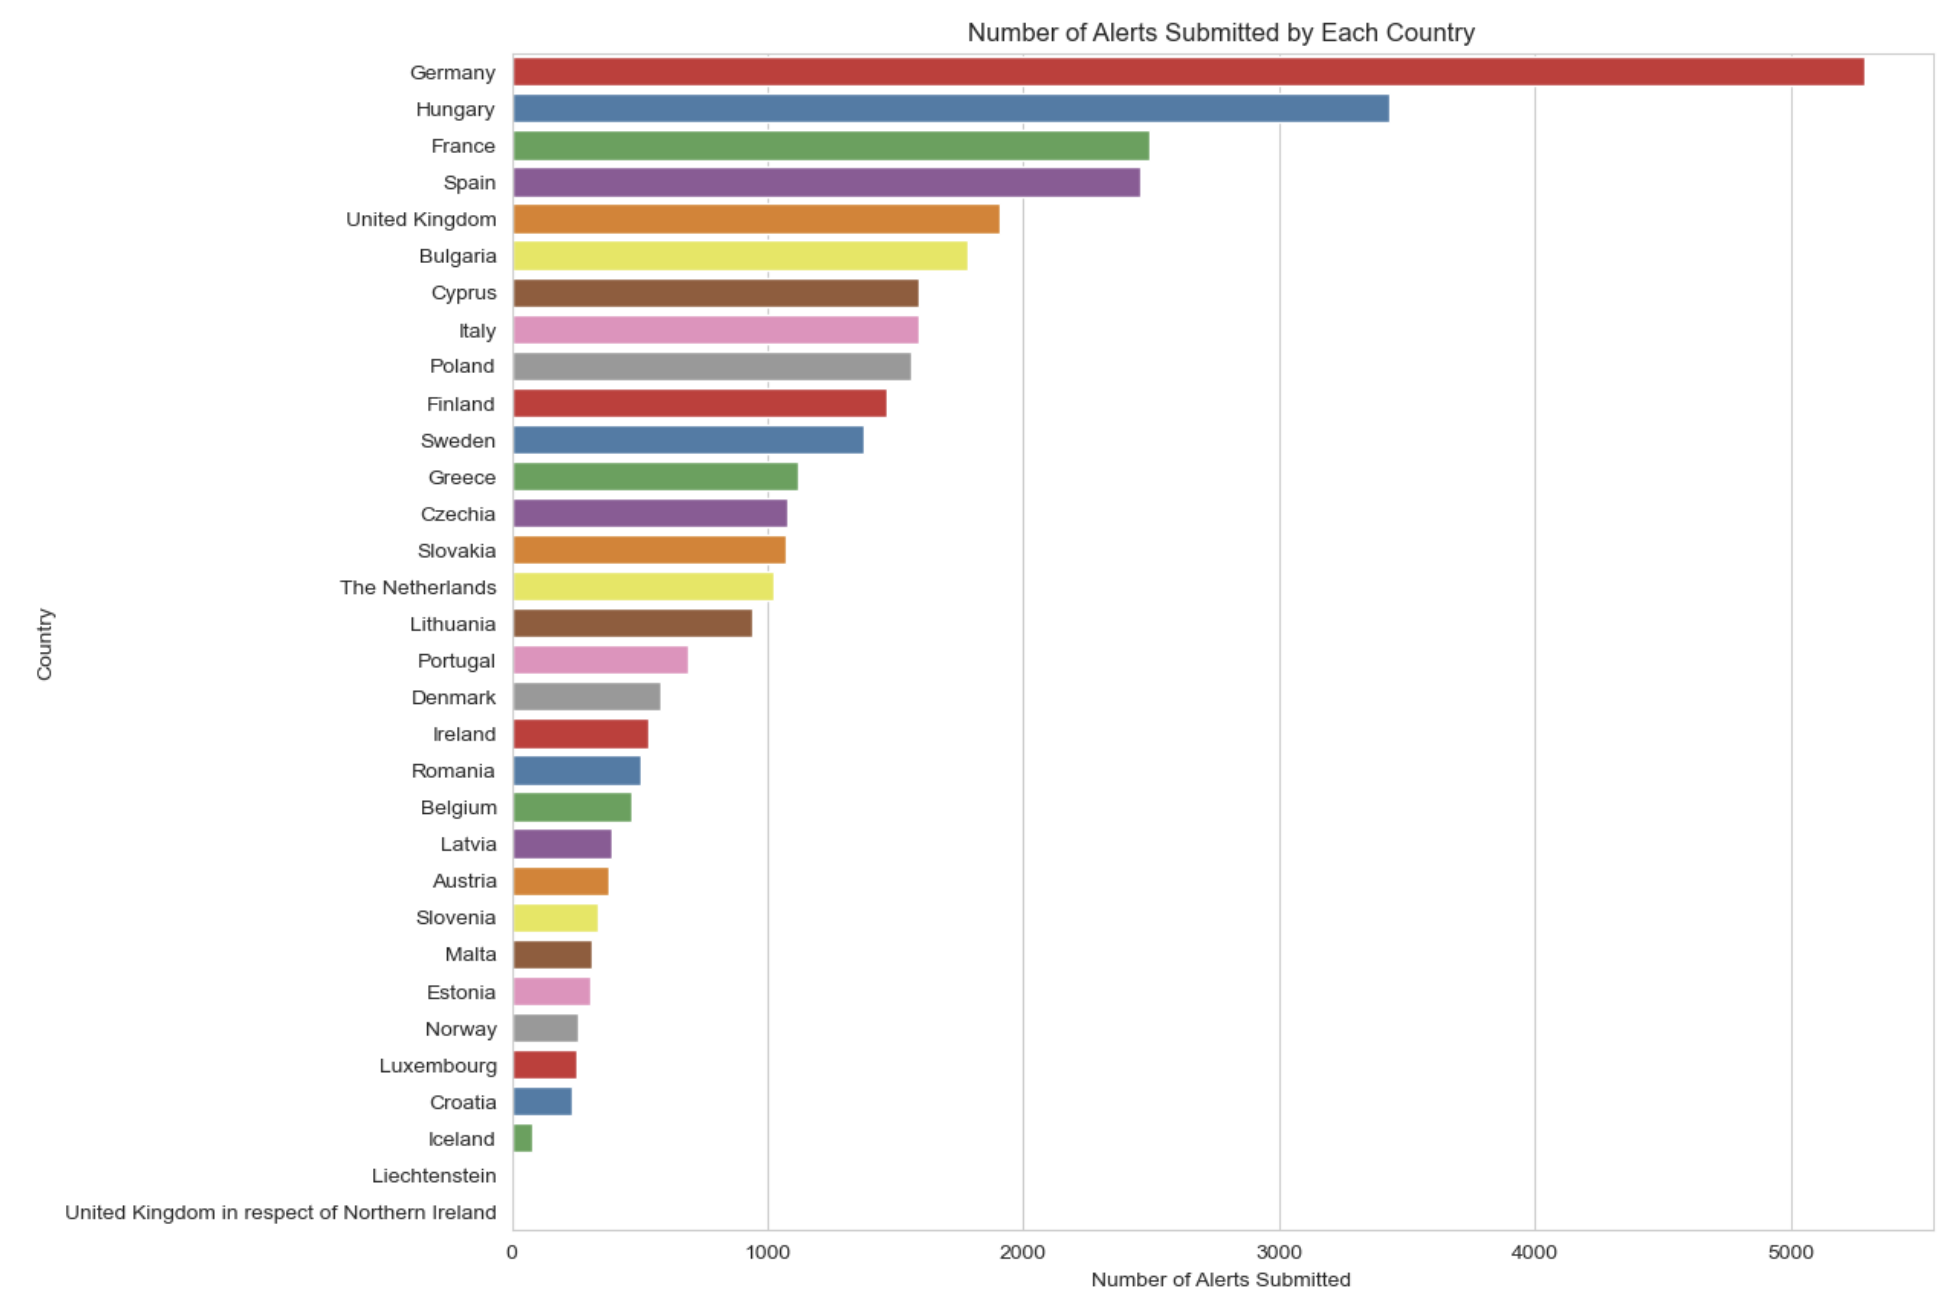



__ALERTS BY TYPE OF RISK__

The graph concerning type of risk is a __horizontal bar plot__. The reasoning is exactly the same as above. Now one difference with this graph is that I have only chosen to display the 20 categories which had the most entries in the dataset. This is because there is close to a thousand categories otherwise, and with the vast majority of those entries essentially being 1, it makes little sense to include them in. 

One thing I have noticed about this variable is how redundant some categories are: for example, fire and eletricity are 2 different categories, but then "eletric shock, fire" is a separate category? Fire and "Burns, fire" are also different categories here, something will need to be done to eliminate these redundant categories at a later stage...

We can also observe that the leading risks are Chemical risks, "injury" risks, choking and electric shocks. These do make sense, and the other 20 entries are not suspect either in my opinion (they are all reasonable risks).

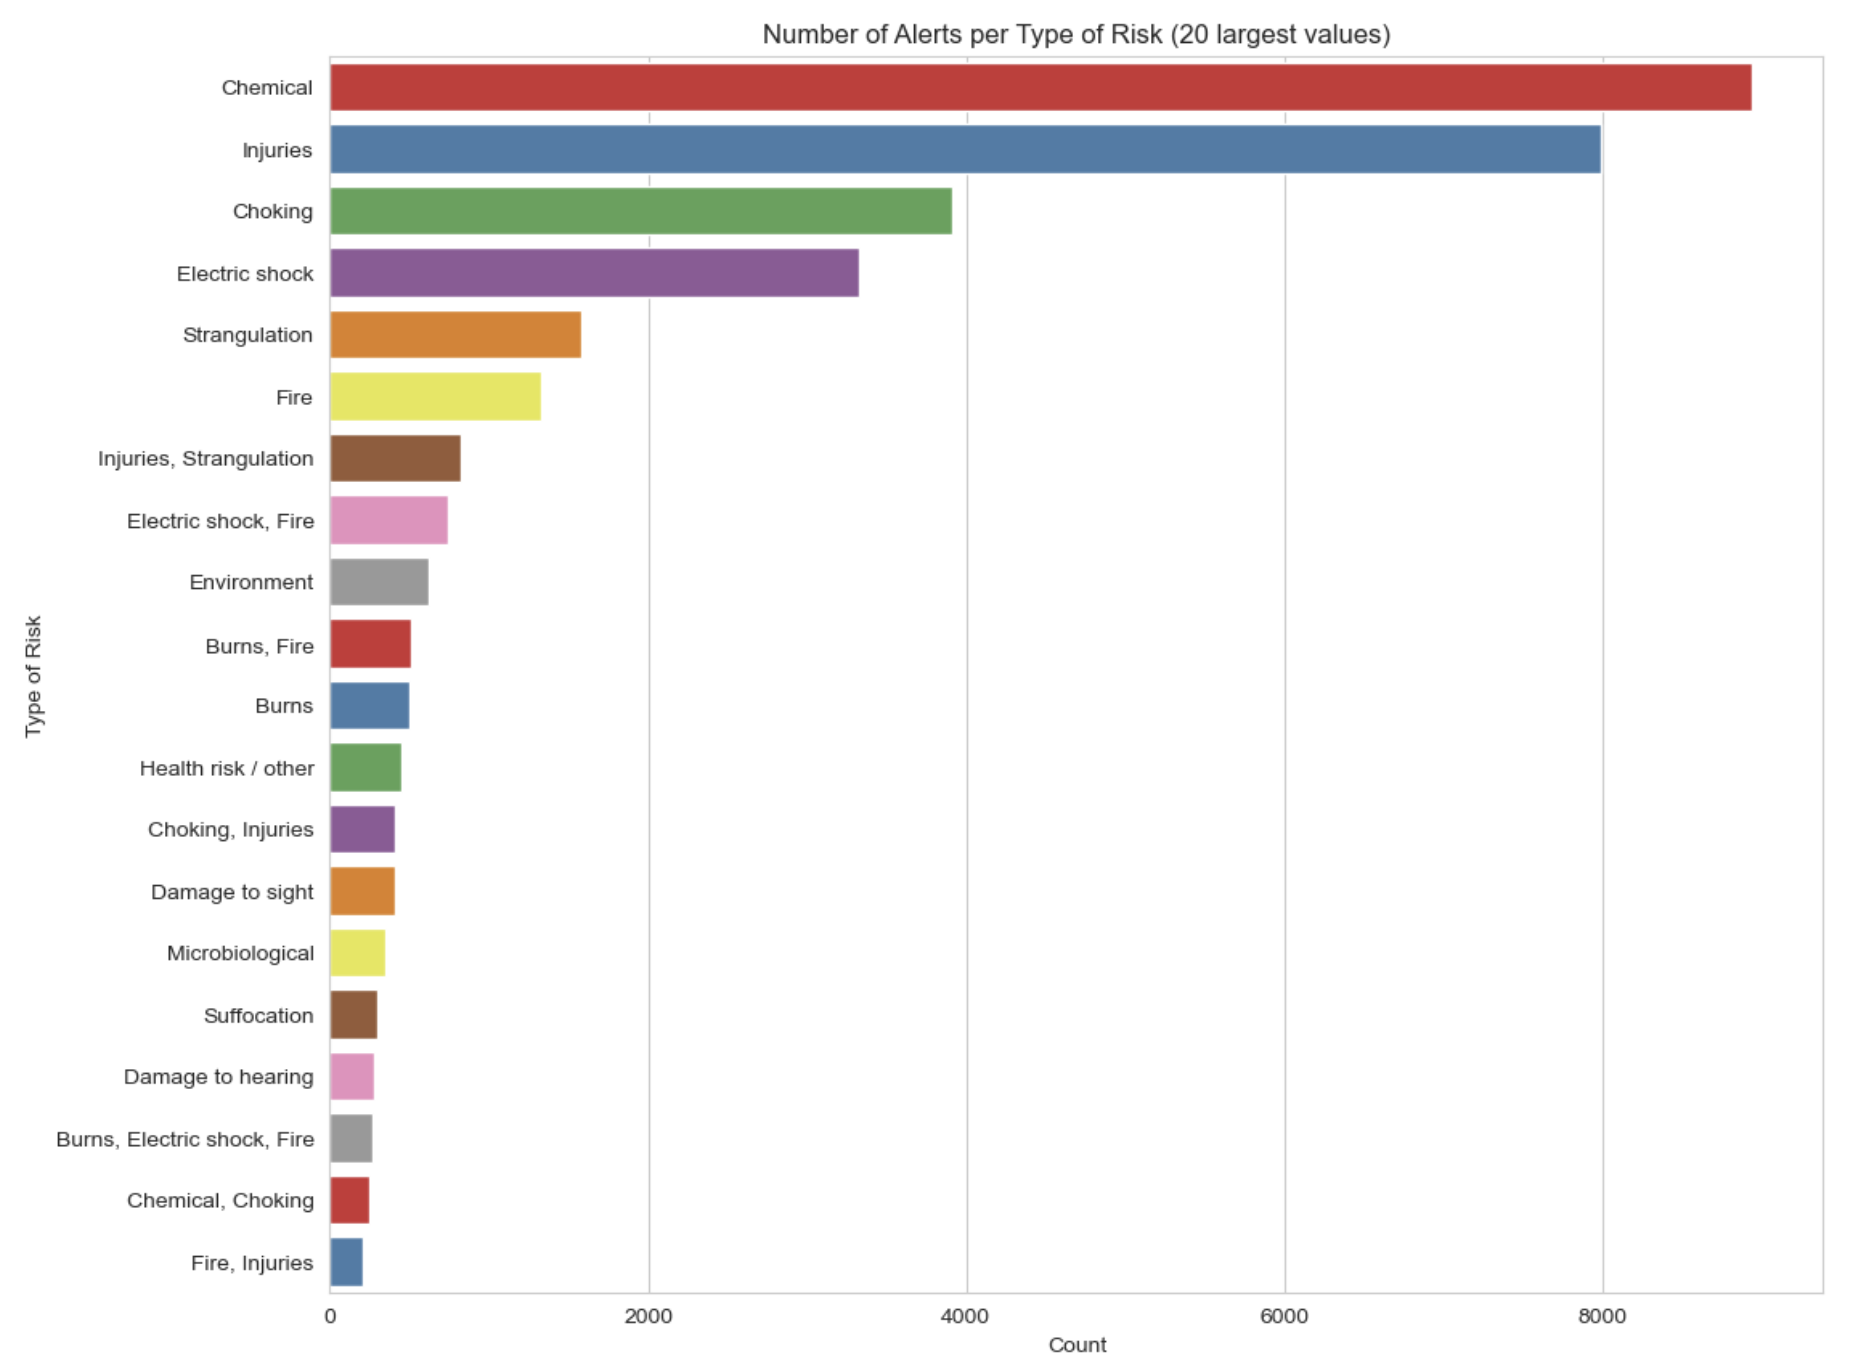



__COUNTERFEIT__ 

The graph chosen for this variable is again a __bar plot__, but this time __vertical__. It makes sense to have this one be vertical because there are only 3 categories.

On the graph, we can see the 3 categories, "Yes", "Unknown", "No". These of course refer to if a product is counterfeit or not. The graph tells a simple story, most of the alerts submitted by countries concern products which are either not counterfeit, or which are of unknown origin. A little over 58% of the total alerts concern non counterfeit products, and only half a percent concern counterfeit goods. 

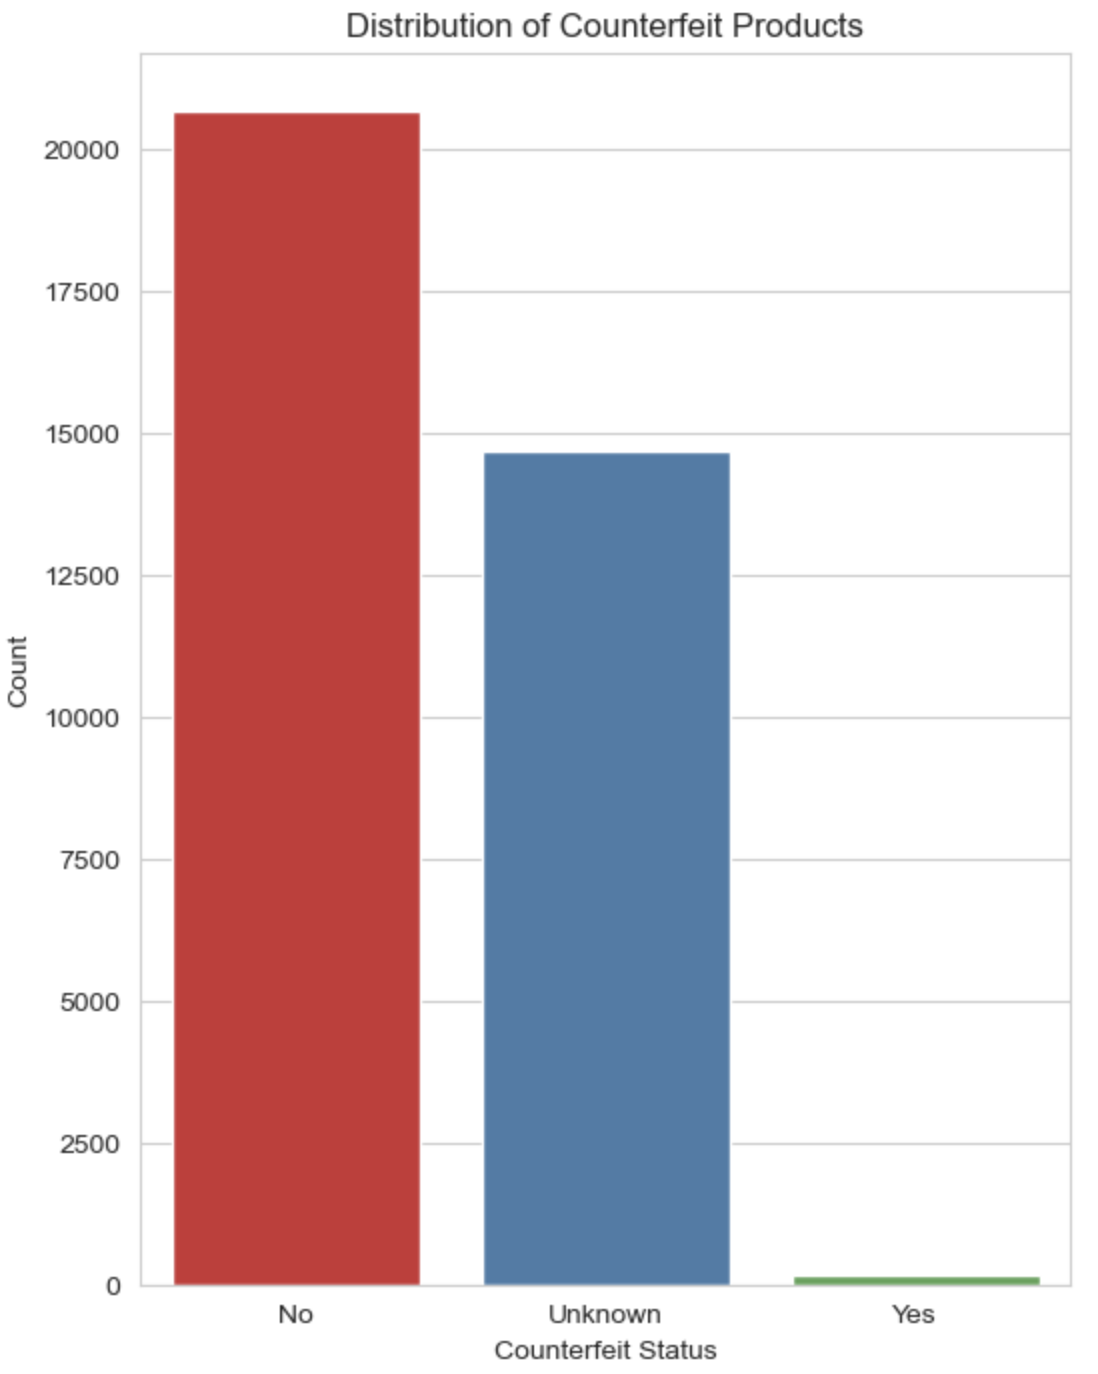



__COMPANY RECALL PAGE__

This variable consists of URLs to different websites. It could be considered categorical, and maybe there is a possibility of grouping the URLs based on their country code. Given the nature of this variable, the only reasonable plot is a __bar plot of the 30 "biggest offenders"__.

While the graph is not the clearest, it still paints a clear picture: most of the concerned companies are related to motor vehicles. Citroen, Peugeot, Mercedes etc, are all involved. it seems like mercedes is the biggest offender based on this graph, but it is very possible that many of the URLs are redundant, and the real story may be different.

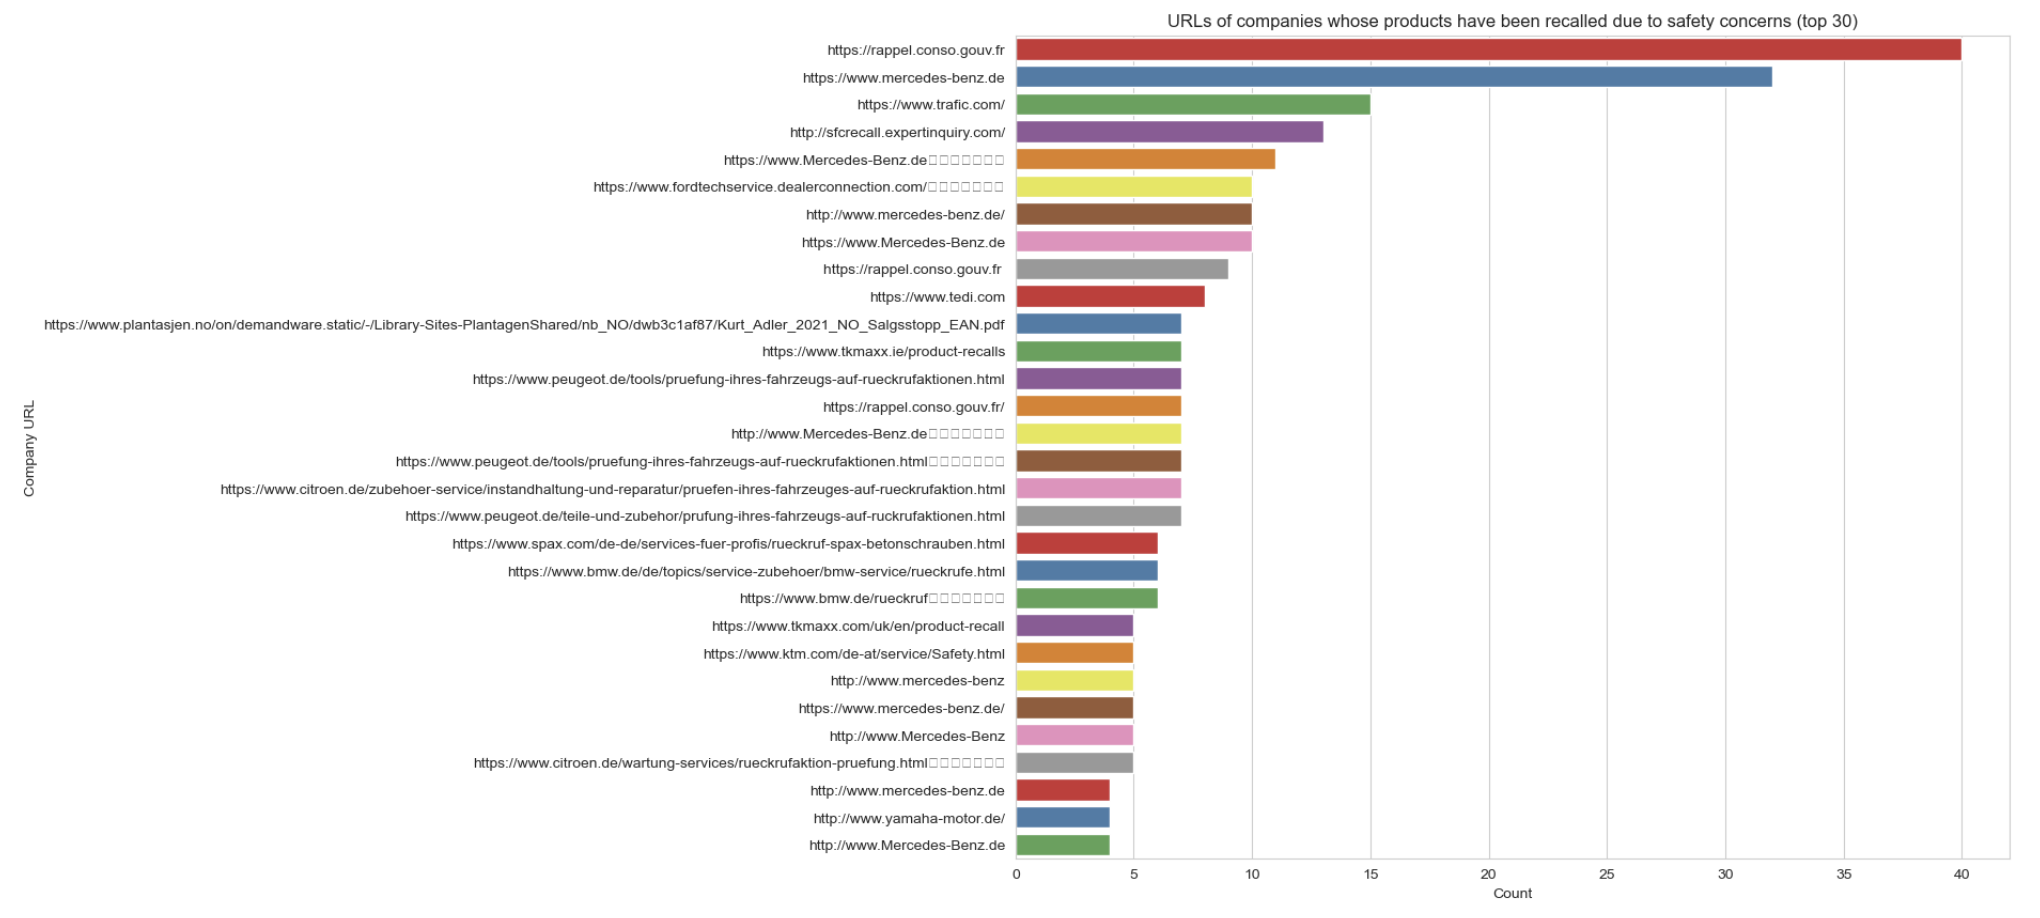



__TYPE__

This variable is one I chose additionally to the given variables. I chose to make a __vertical bar plot__ for this one, as there are only 2 bins, 'Consumer' and 'Professional'. 

The graph tells us that most of the products which have been recalled concern consumers rather than professionals. In fact, 'consumer' accounts for 
98.5% of the data. 

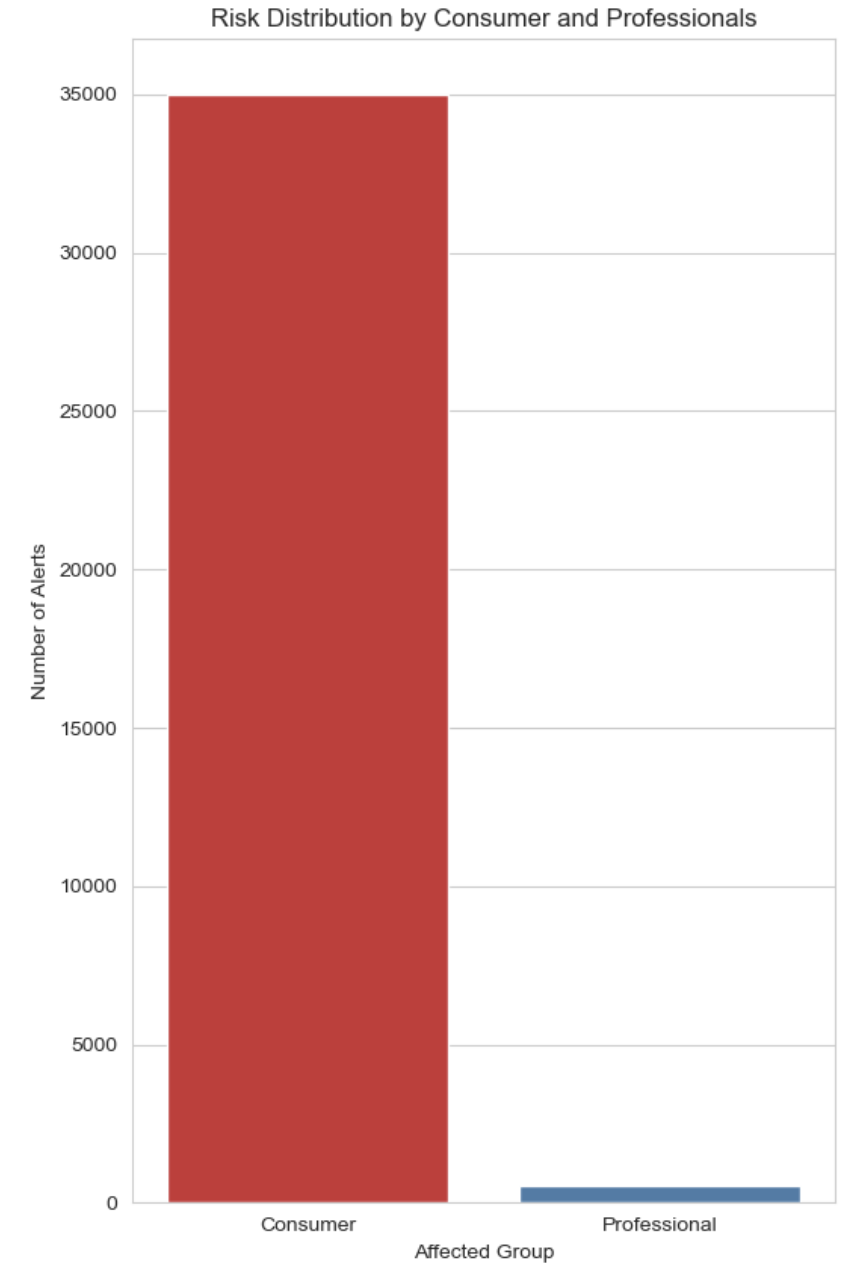



__COUNTRY OF ORIGIN__

This variable is also a personal choice, because it is very interesting to see where the problematic products come from. The graph I chose for this variable is the __horizontal bar plot__, due to the lack of space on the screen for a horizontal plot. Additionally, I have only selected the top 30 offenders, given the size of the dataframe (much higher than 30)

We can clearly see that China is the source of most bad products, unsurprisingly, accounting for 52% of all the data. Other major economies account for much less of the data. It is also interesting to note that a lot of products are from an 'unknown' origin.

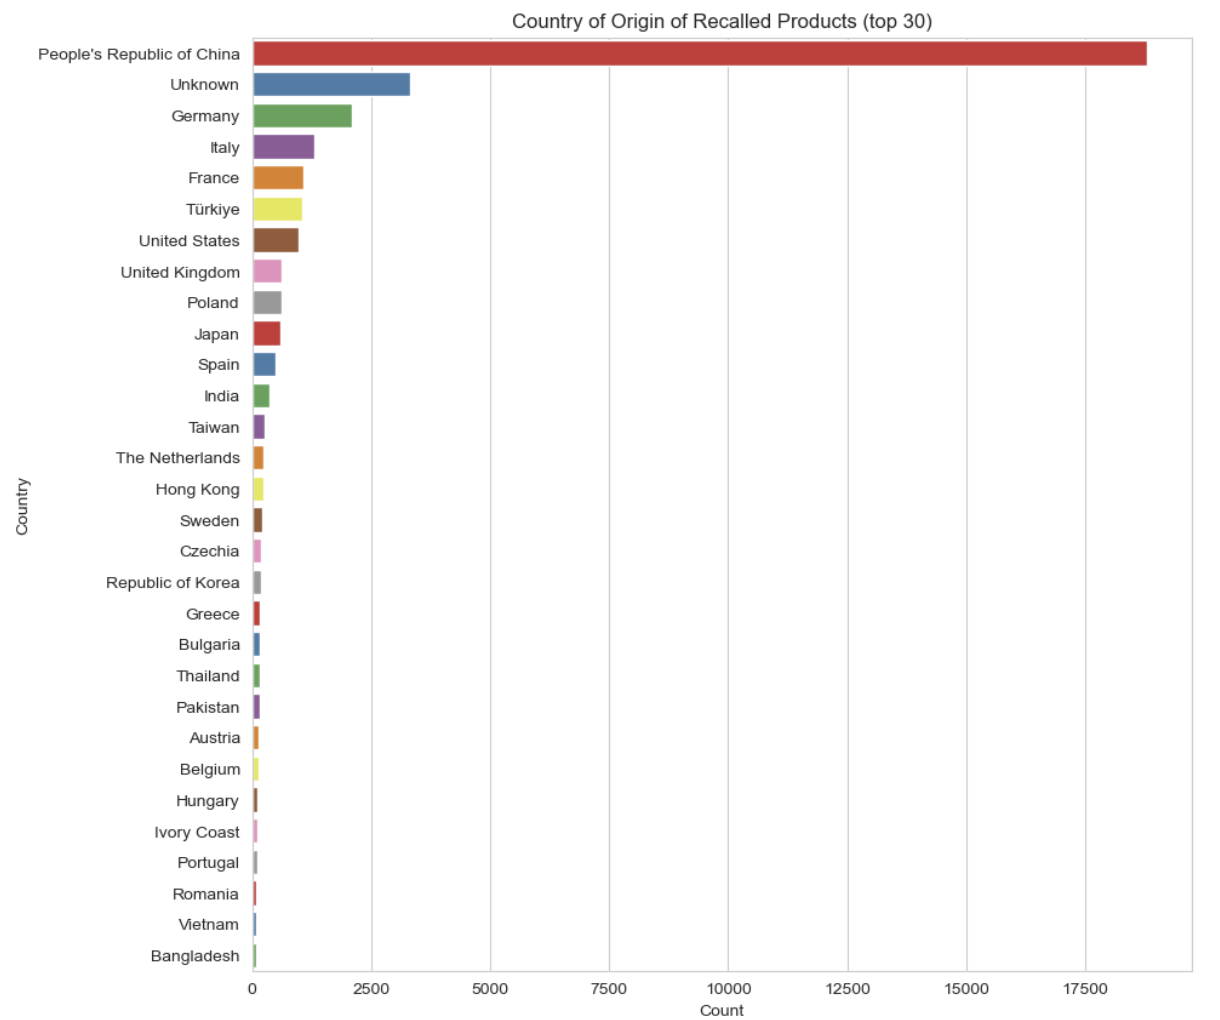



__TYPE OF ALERT__

This variable is also one I chose. It is interesting because it shows what type of alert was the most common. I chose a regular __bar plot__ to plot this variable.

We can see from the graph below that "serious risk" is the most common reason for recalling a product.

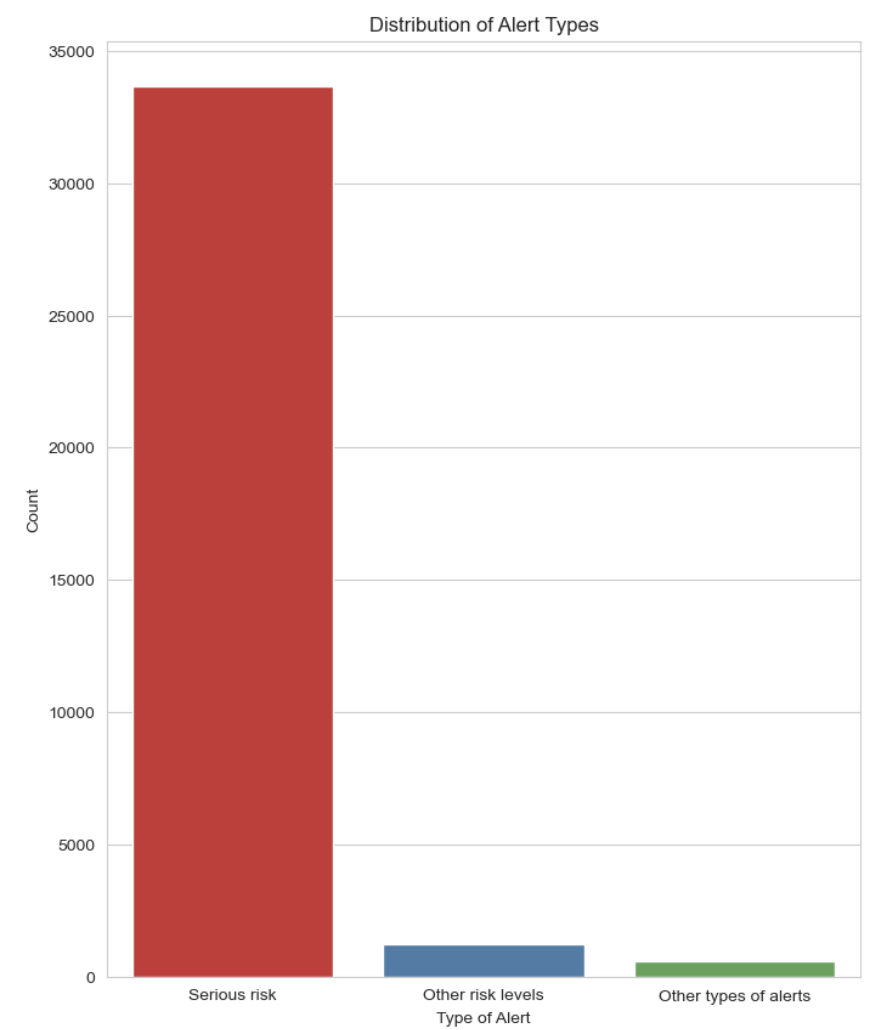


## Question 1b (Getting the year)

The granularity of the dataset is on the individual alerts level. For each alert, we can extract the year that was submitted by inspecting the ``Alert number`` field. There are different formats there, but the last two digits after the last slash (``"/"``) always give you the year that alert was submitted.

e.g. 

``0574/09`` means that the alert was submitted in 2009

``A12/1716/13`` means that the alert was submitted in 2013.


Using the information above, make a relevant function to extract the year, apply it on the ``Alert number`` column and store it on a new column in the original dataframe called ``Year``. We will use this later.

Before proceeding, double check that the calculation is correct for all rows. Report any irregularities.

In [4]:
###code for 1b goes here

def get_year_from_alert(df, col = str): # 2 arguments, dataset and column name
    year_col = df[col].str[-2:] # slice last 2 digits of all column entries
    year_values = [x for x in year_col] # turns all values into a list
    year_errors = []
    for x, y in enumerate(year_values): # loop over index and value in list
        try: # try except statement to separate non numeric from rest
            year_values[x] = int(y) # convert to int, later int64
            if year_values[x] > 24:
                year_errors.append(x) # save index of problematic entry
        except:
            # print(year_values[x]) # DEBUG
            year_values[x] = np.NaN # placeholder to check if any problems
            year_errors.append(x) # append error to error list
    df['Year'] = year_values # cast list to new column in df
    # df['Year'] = df['Year'].astype('int64')

    # debug
    # print(year_values)
    print(len(year_errors)) # this is essentially how many numbers are irregular
    print(year_errors)

get_year_from_alert(df, 'Alert number')

5
[7086, 11684, 11688, 30336, 31028]


*** ANSWER TO 1.B ***

The function I wrote succesfully casts the last two digits of the "Alert number" column to the new column "Year". What is interesting to note is that there are 2 entries which cannot be converted to int, namely a float and a random character. There are also 3 entries higher than 24, which does not make sense given we are in 2024. There are no values below 0. Total of 5 errors in the dataset

Observation -> Many (6156) values are below 10, but the dataset should have values for 2010 onwards ? Potential issue ?

Solution -> I have set both the problematic years to "None" as a placeholder.
         -> The index of relevant bad entries are : [7086, 11684, 11688, 30336, 31028]

## Question 1c (Identifying issues with the data)

Inspect the variables (based on the codebook) and identify potential issues with one (or more) of them. Think about missing values, mistakes, outliers, errors etc. Provide possible (and plausible) explanations for the missing data. Correct these and justify your answers accordingly.

In [5]:
###code for 1c goes here

### ALERT NUMBER ### 
# Duplicate rows at alert number 0259/06 and 0145/07
df = df.drop_duplicates(subset = ['Alert number']) # removes dupes and replace

### YEAR ### 
# fix the problematic years
df.iloc[7086, df.columns.get_loc('Year')] = 10
df.iloc[11684, df.columns.get_loc('Year')] = 8
df.iloc[11688, df.columns.get_loc('Year')] = 8
df.iloc[30336, df.columns.get_loc('Year')] = 9
df.iloc[31028, df.columns.get_loc('Year')] = 8

### RECALL PAGE ###
q1a_dfs['df_company_recall_page']


company_recall_page  count  frequency
0                         https://rappel.conso.gouv.fr     40   0.001126
1                         https://www.mercedes-benz.de     32   0.000901
2                              https://www.trafic.com/     15   0.000422
3                  http://sfcrecall.expertinquiry.com/     13   0.000366
4           https://www.Mercedes-Benz.de\t\t\t\t\t\t\t     11   0.000310
..                                                 ...    ...        ...
812                                 http://www.ebay.fr      1   0.000028
813                               https://www.wish.com      1   0.000028
814                             http://www.sexshop.fi/      1   0.000028
815            https://info.nzxt.com/h1-safety-notice/      1   0.000028
816  https://www.theworks.co.uk/on/demandware.stati...      1   0.000028

[817 rows x 3 columns]

In [ ]:
# function to find how many entries are NaN per col

count_nan_dict = {} # dict to save how many NaN per col

def count_nan(df):
    global count_nan
    for col in df.columns: # iterate over all columns
        # condition for finding NaN etc
        df_nan = df[col].isna().sum()

        # save to global dict 
        count_nan_dict[col] = df_nan
        
count_nan(df)

count_nan_dict

***ANSWER TO Q1.C***

Much of this answer is based on the output of my 'count_nan' function defined above

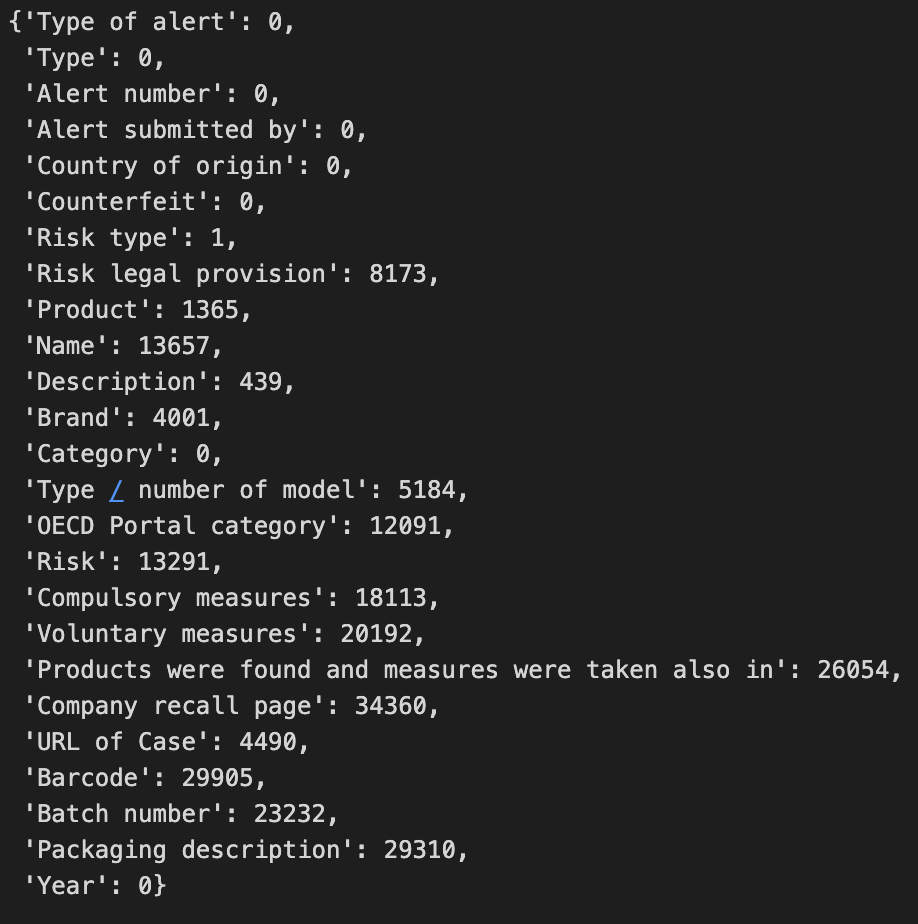

__ALERT NUMBER__

I have found that a few entries last 2 digits (year) are wrong, some are above 2023, and some are not convertible to integers. This is really only the case for 5 entries, there was not much to worry about here. Another perhaps surprising thing is that over 6000 of the entries are pre-2010, and the dataset should have entries above 2010? It may also be the case that the website was created in 2010 however...

There are no missing values in this column apart from the few errors mentioned above.

__YEAR__

I have determined that 5 entries of "year" were problematic after writing my function. The indices where problems lie are the following: 
[7086, 11684, 11688, 30336, 31028]. A few entries are above 23, which makes no sense at all, and a few are also html tags, which is not correct. I have checked the website manually and solved all the problems myself.

__Type / number of model__

This column is full of entries, but they are completely unique, and do not follow the same format at all. I cannot use it for anything useful.

Additionally, the column seems to have 5184 missing entries.

__COMPANY RECALL PAGE__

This variable has plenty of issues: first of all, there are countless duplicates. There are also redundancies, for example mercedes-benz website is listed dozens of times with small variations. This could make sense if all URLs redirect to a page per recalled product however. 

There are also more than 34k missing values in this column, it is extremely unreliable and is likely subject to much bias. This could explain why there is such a large number of automobile related webpages in this column. This skews my own insights on the data.

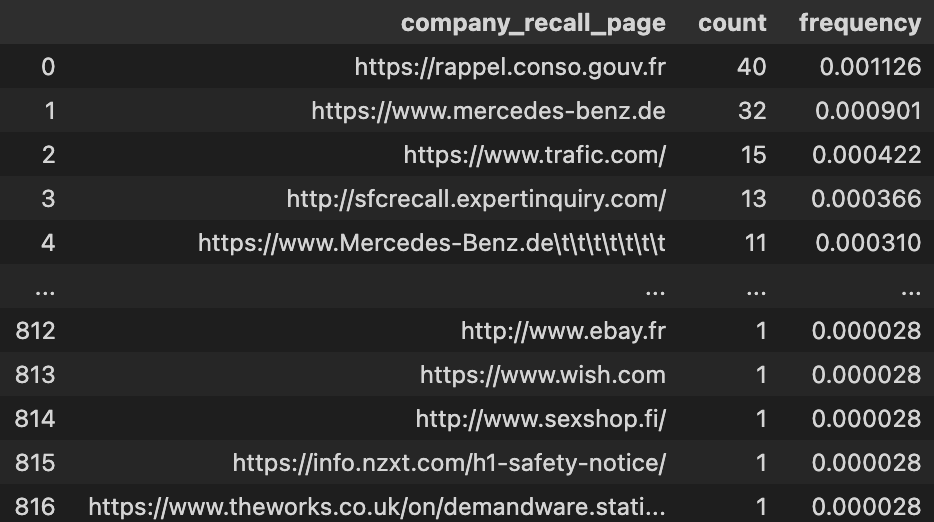

__RISK TYPE__

This column has only one missing value. The rest of the column seems to be in order. 

__RISK LEGAL PROVISION__ 

In this column, I identified 8173 missing values.

__PRODUCT__ 

This column has 1365 missing entries. 

__NAME__

In addition to not being a very useful column due to its unique entry nature (meaning names are typically unique, and don't provide me with anything to work with in this task), I identified 13657 missing values in the column. 

__DESCRIPTION__ 

Also a unique entry column (like name and alert number), contains 439 missing entries.

__BRAND__ 

This could be useful if many of the brands are similar. There are 4001 missing entries in this column. 

__OECD PORTAL CATEGORY__

12091 of the entries of this column are missing. What is more interesting is that when looking at this column, many of the entries are 'Toys/Games'.

There aren't many different entries in this column, but there are too much to fix anything about it.

__RISK__ 

There are many missing values in this column (13291), but what is more interesting to notice here is that many of the entries in this column are either extremely similar or exactly the same.

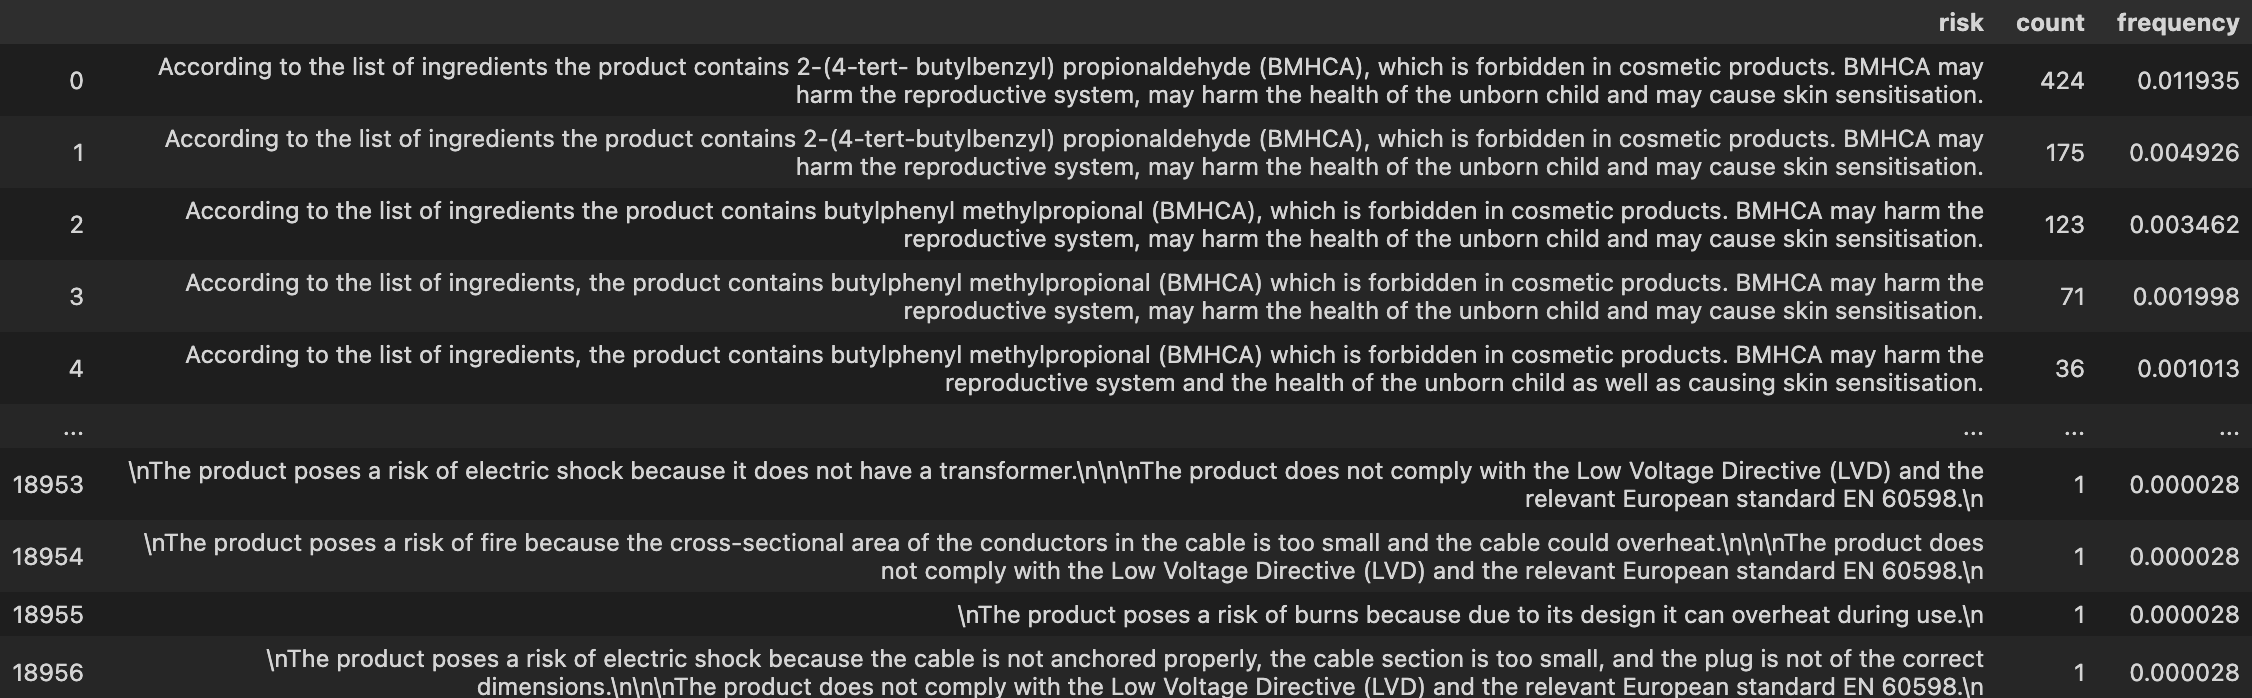

__COMPULSORY MEASURES__ 

Here I noticed again that many of the entries in this column are exactly the same, but typos or formatting errors make it so that they are not being recognized as the same by Pandas. In addition to 18113 missing entries, this column has many issues, as can be seen below.

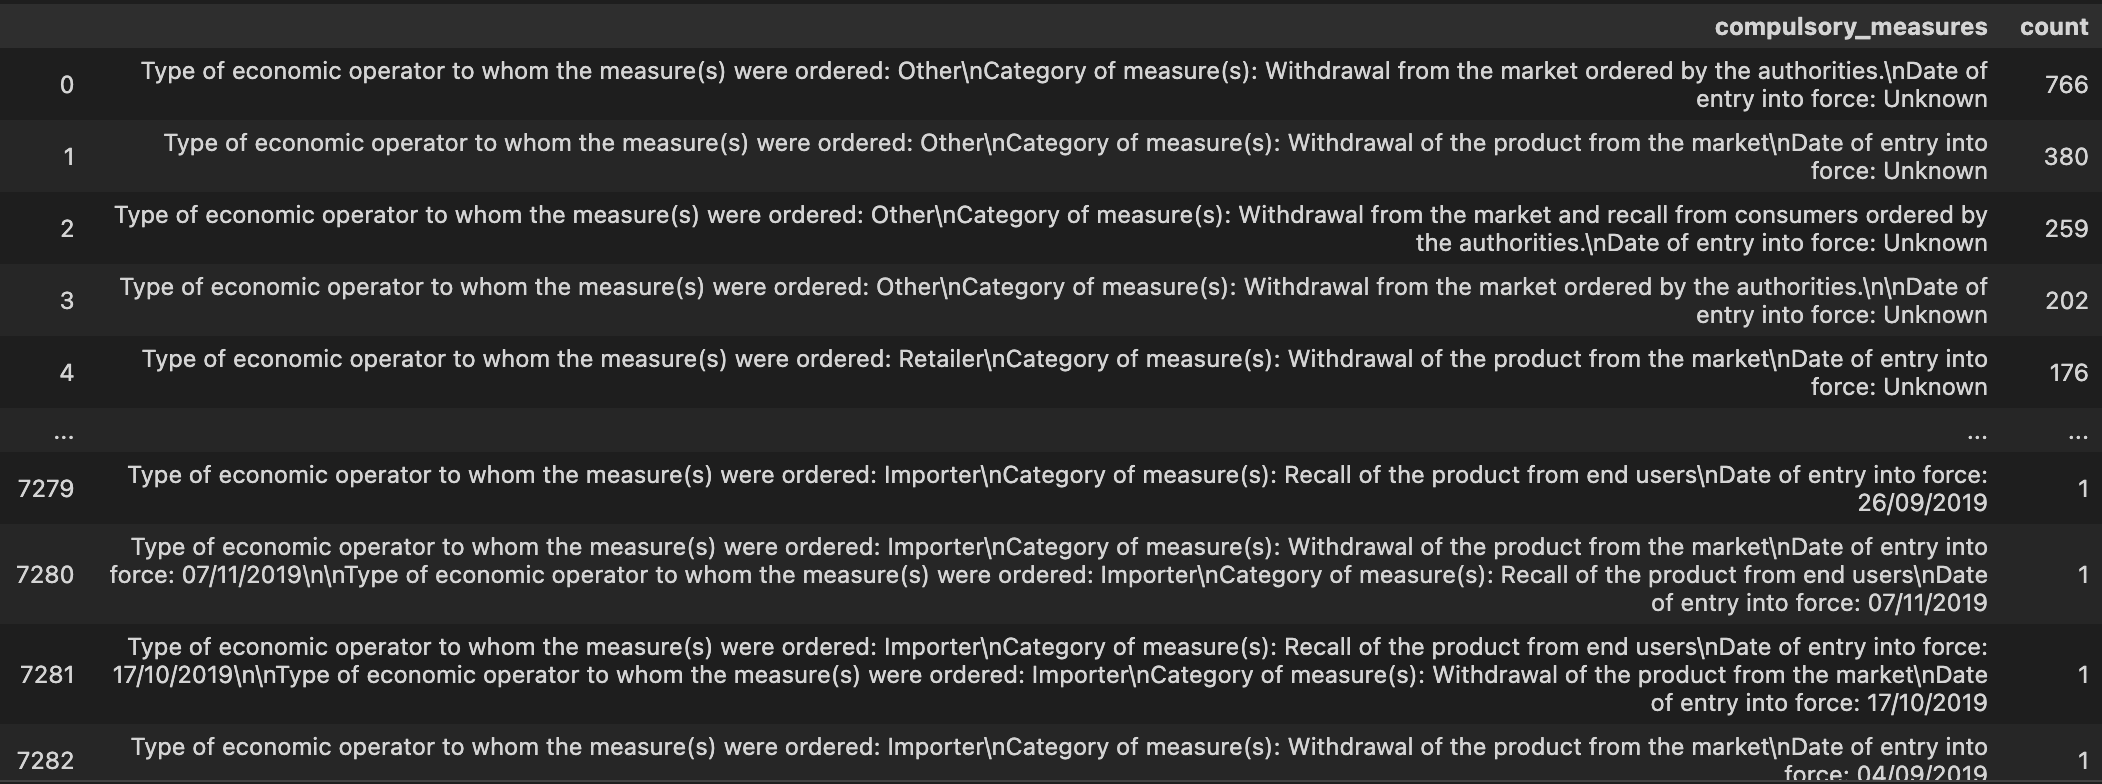

__VOLUNTARY MEASURES__

Again, there is the same issue as for a few of the other columns. There are also 20192 missing entries in this column. Many of the entries are identical, yet are grouped separately due to formatting mistakes.

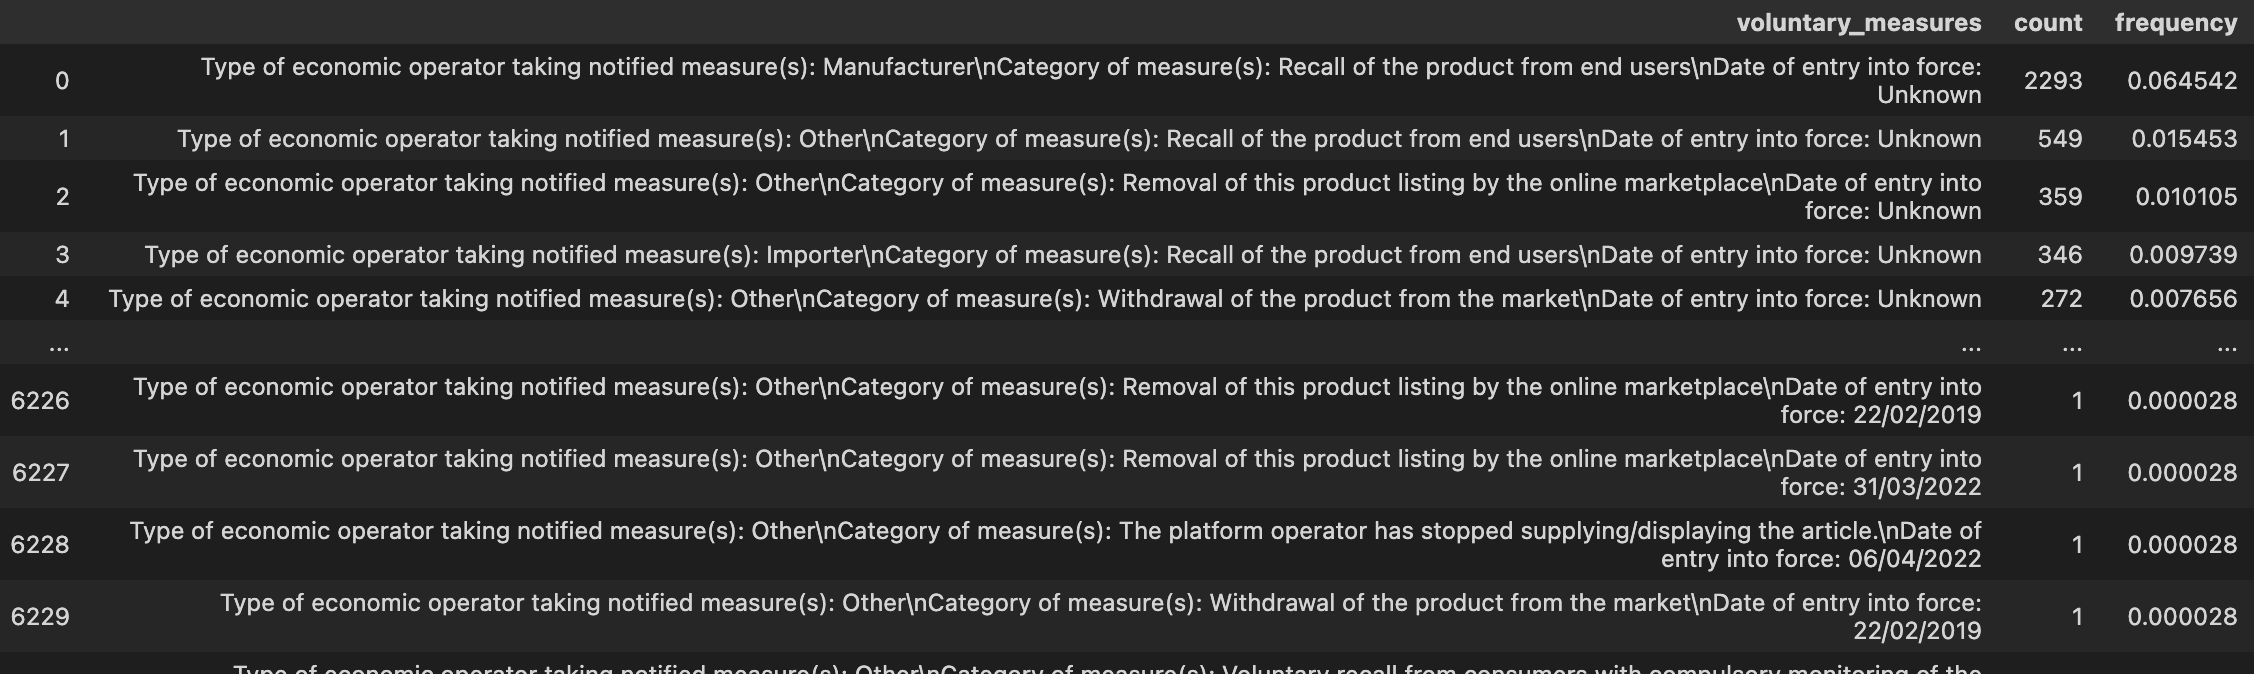

__PRODUCTS WERE FOUND AND MEASURES WERE TAKEN ALSO IN__ 

The 'problem' in this column is the fact that there can be many different countries per entry. This is resolved in a later task in this clinic, and is therefore not a big issue.

What is more concerning is that there are 26054 missing entries in this column. 

__URL OF CASE__

There are 4490 missing entries in this field. Many of the URLs are similar, but they do lead to different pages after all, so there isn't much of a concern to be had over this column. 

__BARCODE__

In this column, there are 29905 missing entries. That and the fact that the entries are all unique, this column is not of much use, except maybe for manual data correction (unlikely with 29905 missing entries)

__BATCH NUMBER__

There are 23232 missing entries in this column, and the issue is the same as for the 'barcode' column.

__PACKAGING DESCRIPTION__

24310 missing entries, and many entries are the same with different wording, this is again an example of poor formatting within this dataset.

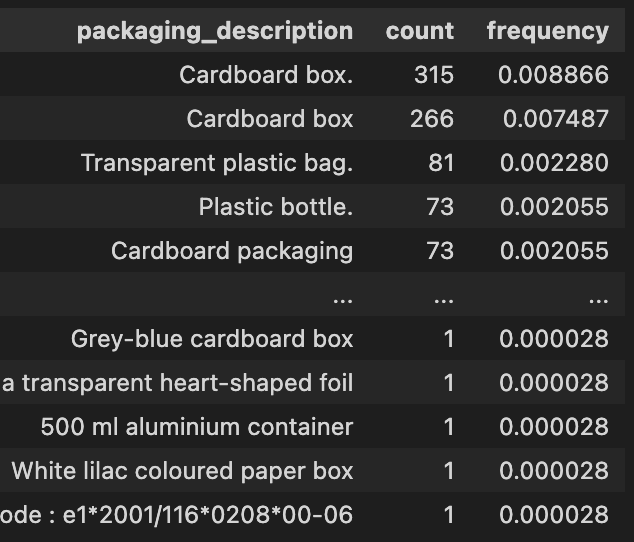

---
## 2: Exploring the Distribution of Alerts 

The granularity of this dataset is on the individual alerts level. In the following, we are going to investigate different aggregation levels (e.g. notifying country, type of risk etc.). The following questions require some heavy plotting. Below we are summarizing some functions (should be updated on the latest versions). 

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

## Question 2a

We will first plot the evolution of the total number of alerts over the years. For this reason we are going to use the ``Year`` column you added earlier (Question 1b) to the dataframe.

**Hint**: You can use `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/docs/reference/groupby.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. Take a look at the `'first'` or `'last'` aggregation functions.

Your plot should be a lineplot. Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these.

Text(0, 0.5, 'Total Number of Alerts')

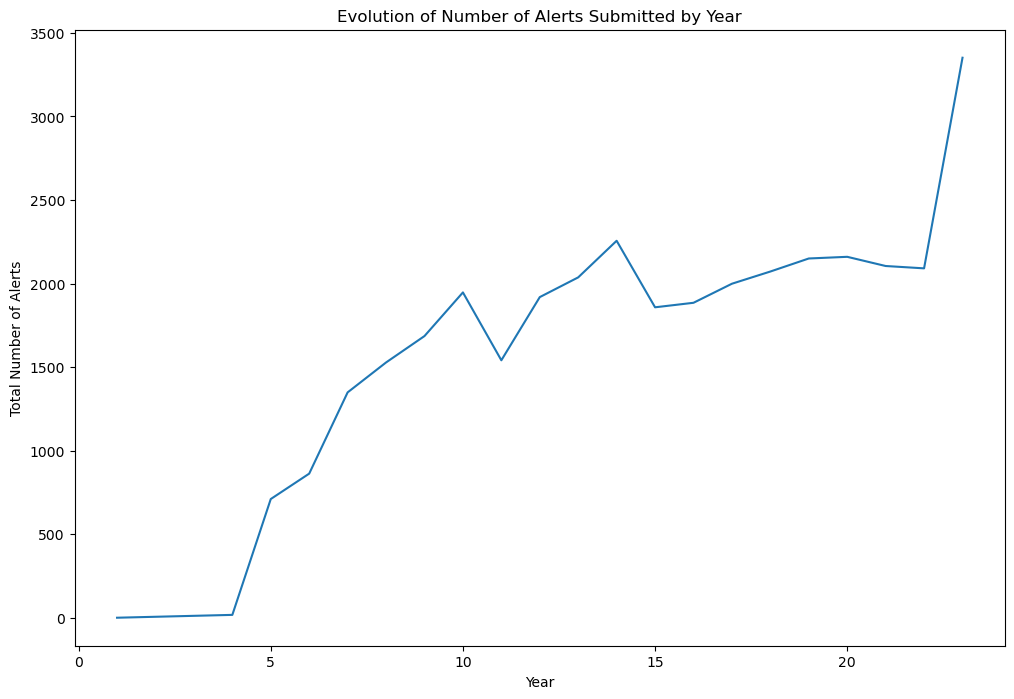

In [7]:
#code for 2a goes here

# no need to use agg ? if using size
df_count_per_year = df.groupby(['Year']).size().reset_index(name = "Year count") # reset index to cast to DataFrame instead of Series

plt.figure(figsize = (12, 8))
sns.lineplot(x = df_count_per_year['Year'],
             y = df_count_per_year['Year count'],
             legend = True)
plt.title("Evolution of Number of Alerts Submitted by Year")
plt.xlabel("Year")
plt.ylabel("Total Number of Alerts")

In [10]:
df_count_per_year

Year  Year count
0    1.0           1
1    4.0          18
2    5.0         711
3    6.0         863
4    7.0        1349
5    8.0        1528
6    9.0        1686
7   10.0        1947
8   11.0        1541
9   12.0        1919
10  13.0        2037
11  14.0        2256
12  15.0        1858
13  16.0        1885
14  17.0        1999
15  18.0        2072
16  19.0        2150
17  20.0        2160
18  21.0        2105
19  22.0        2091
20  23.0        3351

***ANSWER TO 2A***

The figure below tells an interesting story: 

Between the years 2001 and 2004, less than a dozen of alerts were submitted. 
Between 2004 and 2005, the number of alerts submitted went up by more than 700!
A steady increase in the number of alerts submitted between 2005 and 2010 can be seen.
From 2010 to 2011, the number of alerts submitted decreased strongly.
In the period 2011 - 2014, the number of alerts increased once again.
From 2014 to 2016, they fell once again, although not dramatically.
From 2016 onwards, there were small increases and smaller declines, before spiking once again in 2023.

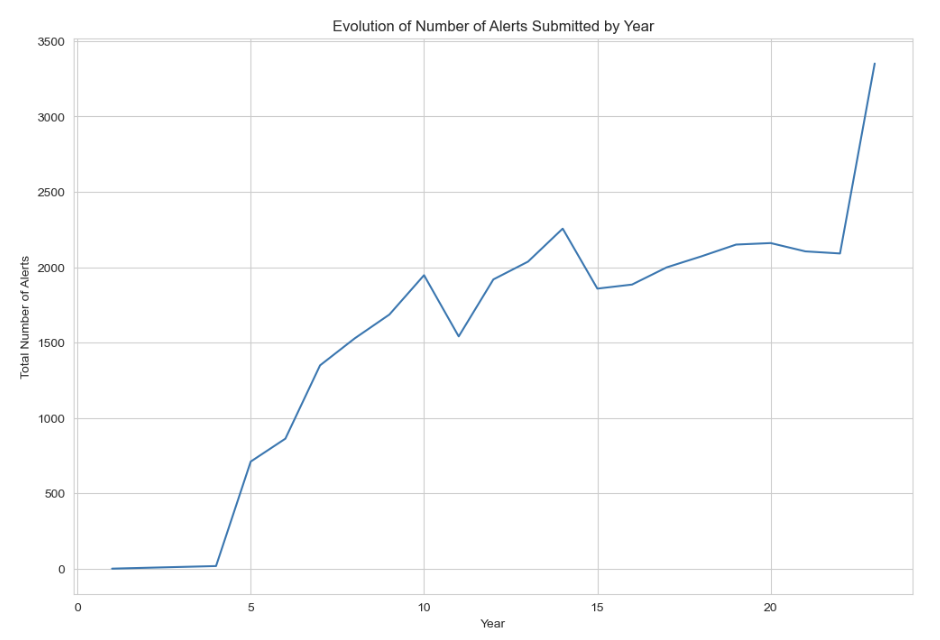 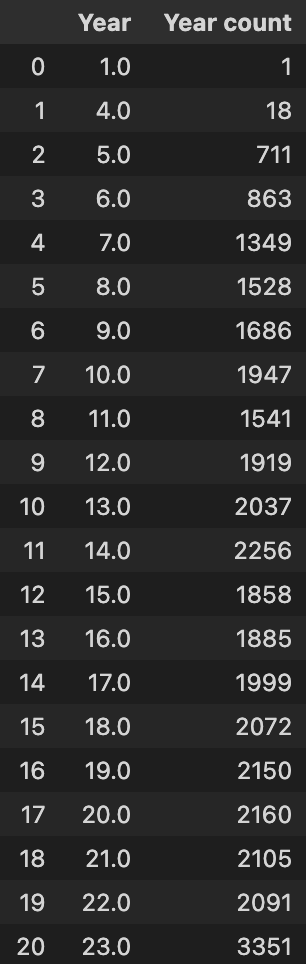

## Question 2b

Now we are going to investigate two interesting plots:

The first one, should plot the top-5 product categories (``Category``) per year.

The second one, should plot the top-5 risk types (``Risk type``) per year.

Advice:
- Note that year is a quantitative variable, however both ``Category`` and ``Risk type`` are categorical, therefore pay attention to the type of plot(s) you are going to use here.
- If the plot becomes too crowded, feel free to plot only the recent x years (where x is left to your critical decision making).
- Make sure to use relative numbers (i.e. percentages) for the Y axis of the plots (i.e. 2025 could have 25% of alerts from 'Cars', 17% from 'Perfumes', 15% from Electronics etc.).

Comment on the plot(s):

What are the most prevalent risks and products over the years?

Do you notice any significant change over the years (either in terms of ordering or in terms of e.g. new entries)?

Other interesting findings?

In [240]:
#code for 2b goes here

# first making the dataframe for the risk type

risks_grouped = df.groupby('Year')['Risk type'].value_counts()  # group by method
total_risks = risks_grouped.groupby(level=0).sum()  # need level otherwise this doesn't work somehow
q2cdf = risks_grouped / total_risks  # get relative freq
q2cdf = q2cdf.reset_index(name='Relative Frequency')  # Reset index and create a new column
q2cdf = q2cdf.groupby('Year').head(5) # get top 5 years only in terms of frequency

q2cdf['Year'] = q2cdf['Year'].astype(int)

# normalize the frequency (only take top 5, this is required otherwise incorrect plot + freq)
q2cdf['Normalized Frequency'] = q2cdf.groupby(['Year'])['Relative Frequency'].transform(lambda x: x / x.sum())


q2cdf

Year             Risk type  Relative Frequency  Normalized Frequency
0        1  Electric shock, Fire            1.000000              1.000000
1        4        Electric shock            0.333333              0.352941
2        4  Electric shock, Fire            0.222222              0.235294
3        4           Suffocation            0.166667              0.176471
4        4              Injuries            0.111111              0.117647
...    ...                   ...                 ...                   ...
1048    23              Chemical            0.479857              0.608169
1049    23              Injuries            0.147120              0.186460
1050    23               Choking            0.058490              0.074130
1051    23           Environment            0.056998              0.072239
1052    23        Electric shock            0.046553              0.059002

[101 rows x 4 columns]

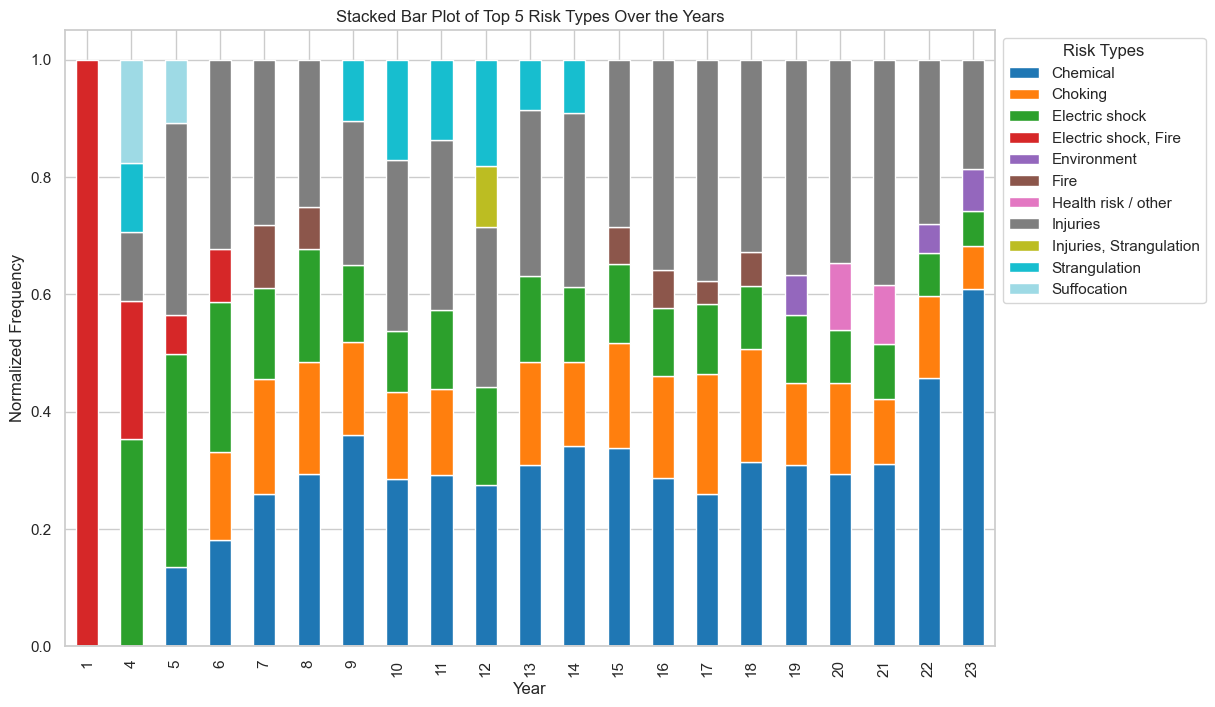

In [294]:
# plt.figure(figsize = (10, 12)) -> Doesn't work in matplotlib ? no effect that i can see

# ChatGPT helped me with this plot specifically, i could not figure out a way to obtain a stacked plot, but this pivot method seems to have done the trick

q2cdf_pivot = q2cdf.pivot(index='Year', columns='Risk type', values='Normalized Frequency') # pivot allows stacking

# using a different colormap / palette because using Set1 just doesn't produce enough different colors for the bins
q2cdf_pivot.plot(kind = 'bar', stacked = True, colormap = 'tab20', edgecolor = 'white', figsize = (12, 8)) # seaborn doesn't have stacked bar plots, using matplotlib

plt.xlabel('Year')
plt.ylabel('Normalized Frequency')
plt.title('Stacked Bar Plot of Top 5 Risk Types Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Risk Types') # moves legend outside of main plot, prevents obstructing the bars

***ANSWER 2b***

The plot below gives much information about the 5 most common risks per year.

What I can see from the plot is that the most common risks per year have changed since 2001, a year in which "Electric Shock, Fire" was the only risk found reported in alerts. 

In 2004 (no data for 2002, 2003), the most common risk reported in the alerts submitted in the database was "Electric Shock", which is the same as what we observe for the year 2005. We also see "Electric Shock, Fire" still is a common risk, but it is not anymore from 2007 onwards. 

From 2004 onwards, "Injuries" became a common risk found in alerts, and there has not been a single year since then where it has not been a top 5 most common risk. 

"Electric Shock" is also a top 5 most common risk every single year since 2004. Interestingly enough, the year 2001's most common risk was "Electric Shock, Fire". Either this is an oversight in the database, or perhaps they are different types of risks. 

From 2005 onwards, "Chemical" has also been in the top 5 most common risks, often being the first most common risk per year. 

From 2006 onwards, I can also see that "Choking" became a consistent top 5 most common risk per year, except in the year 2012, when it was not as common. 

In 2012, "Injuries, Strangulation" made an appearance in the dataframe, this is the only year where it can be found according to my calculations. What is perhaps also interesting is that in the same year, "Strangulation" was a common type of risk, again, are they exactly the same, ie, is this an oversight or a mistake? 

The other types of risk are only found a in limited numbers according to my calculations, there is not a lot to be said about them based on this data, except perhaps the appearance of "Environmental" risk in 2019.

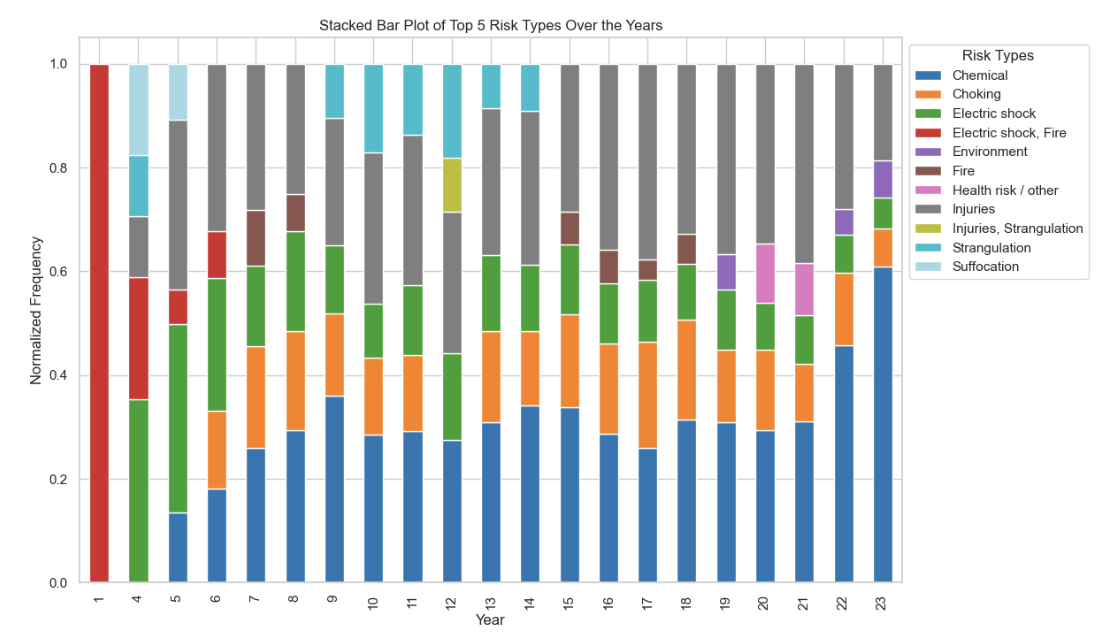

---
## 3: Exploring the Distribution of Alerts per country

The previous analysis includes all alerts across the EU. We would also like to conduct some analysis on the country level.

## Question 3a

We will focus on two fields, the ``Alert submitted by`` (that is the notifying country and should be within the EU+ region, i.e. the EU countries plus Iceland, Switzerland etc.)) and the ``Country of origin`` (that is the country of origin of the product, could be anywhere in the world).

You are asked to construct two plots:
(a) one that shows which countries are submitting most alerts (ordered). Use relative frequencies (i.e. %) instead of the actual number of alerts
(b) one that shows the top-25 countries that unsafe products have as origin. Again, use relative frequencies. 

Comment on your findings.

In [13]:
# here i use the function i defined earlier in Q1 to get my dataframe with count and frequency

df_ordered_alerts_freq = q1a_dfs['df_alert_submitted_by']

df_ordered_country_origin_freq = q1a_dfs['df_country_of_origin'].nlargest(30, 'count')

In [18]:
df_ordered_alerts_freq

alert_submitted_by  count  frequency
0                                         Germany   5290   0.148892
1                                         Hungary   3432   0.096597
2                                          France   2493   0.070168
3                                           Spain   2455   0.069098
4                                  United Kingdom   1905   0.053618
5                                        Bulgaria   1784   0.050213
6                                          Cyprus   1594   0.044865
7                                           Italy   1593   0.044837
8                                          Poland   1563   0.043992
9                                         Finland   1468   0.041318
10                                         Sweden   1379   0.038813
11                                         Greece   1119   0.031495
12                                        Czechia   1079   0.030370
13                                       Slovakia   1073   0.030201
14                                The Netherlands   1026   0.028878
15                                      Lithuania    942   0.026514
16                                       Portugal    689   0.019393
17                                        Denmark    579   0.016297
18                                        Ireland    537   0.015114
19                                        Romania    503   0.014157
20                                        Belgium    469   0.013200
21                                         Latvia    391   0.011005
22                                        Austria    378   0.010639
23                                       Slovenia    335   0.009429
24                                          Malta    312   0.008782
25                                        Estonia    309   0.008697
26                                         Norway    258   0.007262
27                                     Luxembourg    254   0.007149
28                                        Croatia    237   0.006671
29                                        Iceland     80   0.002252
30                                  Liechtenstein      2   0.000056
31  United Kingdom in respect of Northern Ireland      1   0.000028

Text(0, 0.5, 'Country')

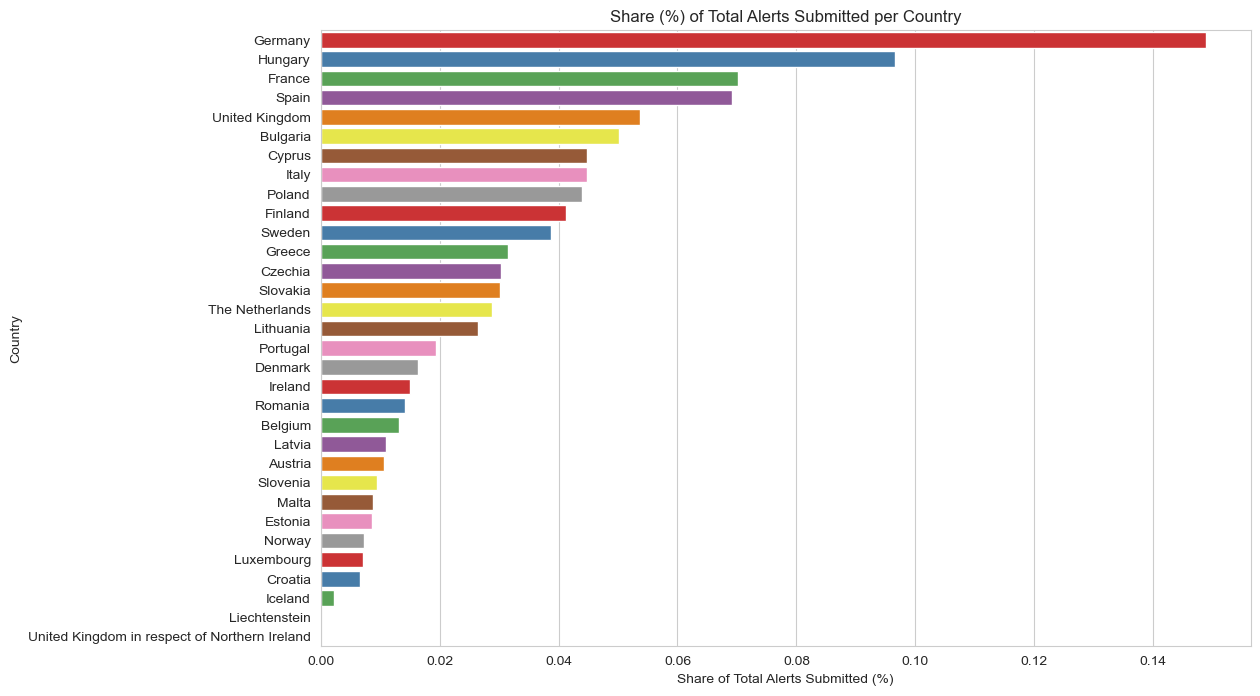

In [15]:
# plot the graph
plt.figure(figsize = (12, 8))
sns.set_style('whitegrid')
sns.barplot(data=df_ordered_alerts_freq, 
            x='frequency', 
            y='alert_submitted_by', 
            orient='h',
            palette = 'Set1')

plt.title('Share (%) of Total Alerts Submitted per Country')
plt.xlabel('Share of Total Alerts Submitted (%)')
plt.ylabel('Country')

Text(0, 0.5, 'Country of Origin of Recalled Products')

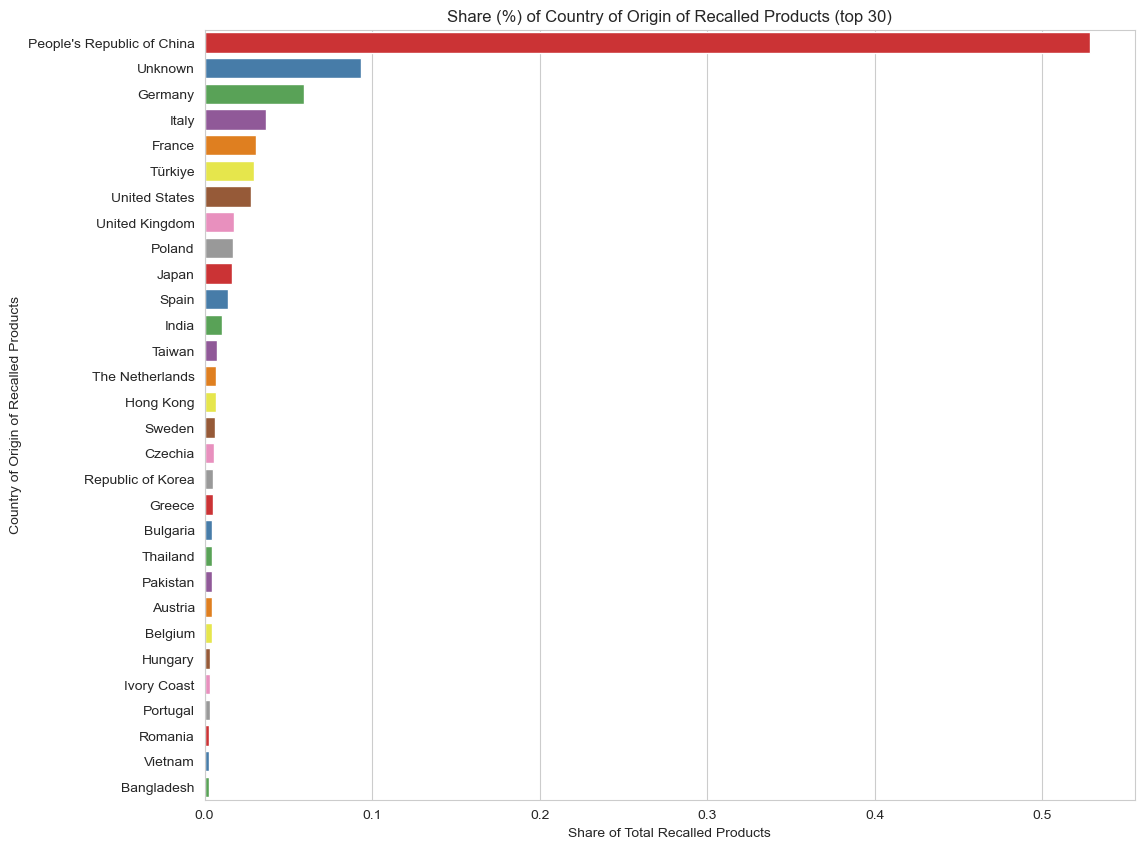

In [19]:
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid')
sns.barplot(data=df_ordered_country_origin_freq,
            x='frequency',
            y='country_of_origin',
            orient='h',
            palette='Set1')

plt.title('Share (%) of Country of Origin of Recalled Products (top 30)')
plt.xlabel('Share of Total Recalled Products')
plt.ylabel('Country of Origin of Recalled Products')

***Q3a ANSWER***

__ALERTS SUBMITTED BY__

The graph below shows us that Germany and Hungary have submitted the most alerts in total. While it seems to make sense for Germany to be the most "prudent" country regarding bad products, it is perhaps surprising to see Hungary being the close second to Germany in this graph. Hungary has 8 times smaller of a population than Germany, yet submits a sizeable number of alerts regarding faulty products. One reason for this could be the fact that Hungary is also "prudent" regarding these faulty products or dangerous goods, but I personally believe this has more to do with the purchasing power of the country. If people can't buy quality products, they buy cheap products, which are more susceptible to have quality issues. Seeing most of them come from China, this would not be surprising. Another reason perhaps could be that their government has very "relaxed" regulations regarding product quality control. Hungary makes up for almost 10% of all alerts submitted, and a country with a similar population size like Belgium only makes up for 1.3% of the total alerts submitted to the EU. It would be interesting to know more about why this is the case.

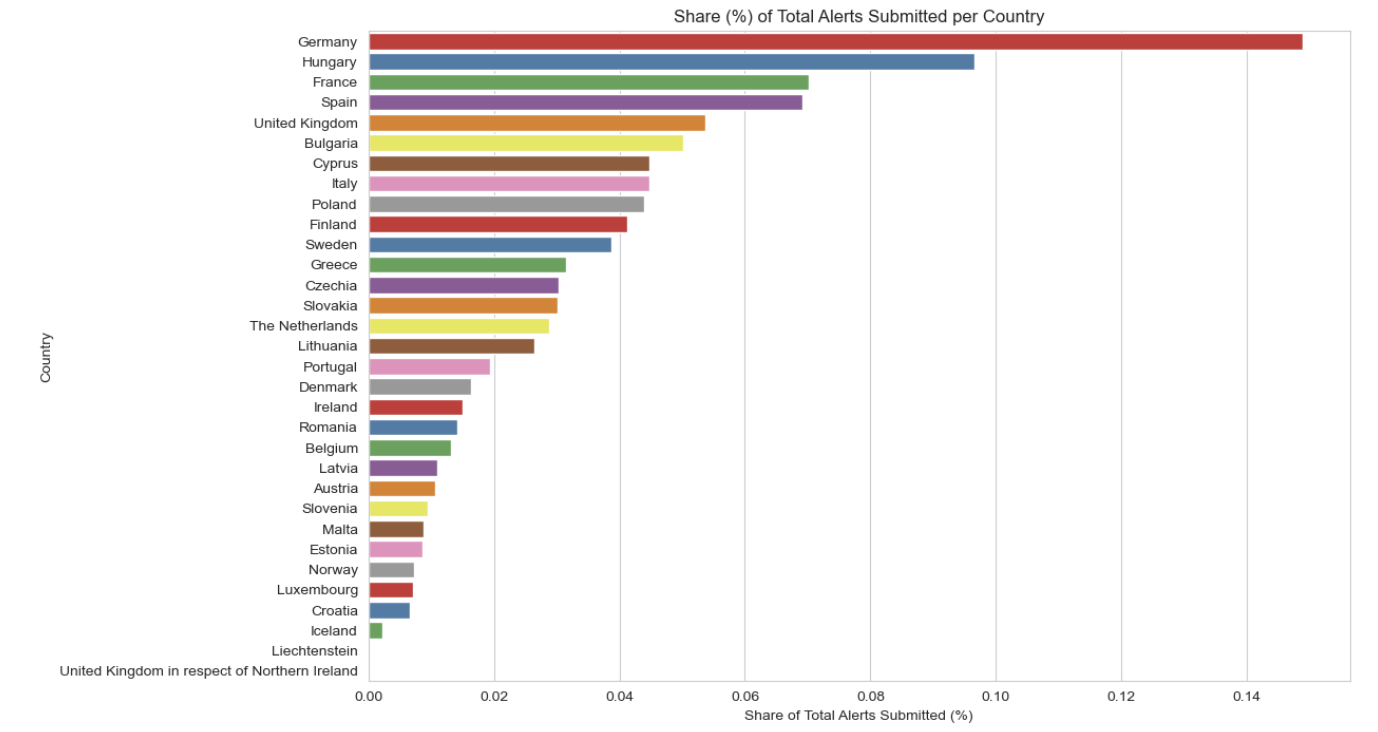

__COUNTRY OF ORIGIN__

The plot below shows the countries which export the most bad goods to the EU. The biggest offender, with no surprise, is China; over 50% of all recalled products origin is China. Unsurprisingly, a lot of the products have an unknown origin. Germany is also the second largest offender in this regard, but this can easily be explained by their impressive automobile industry. After all, cars are one of the most common things to see anywhere in the world, and given their extreme mechanical complexity, it makes sense for there to be large numbers of recalls concerning them. In the dataframe where websites are presented, I saw that Mercedez was one of the most common offenders. It would not be surprising to also find BMW or Audi in that list. We can also notice that countries like Turkey, where counterfeit goods are prevalent, aren't exporting that many faulty products when compared to China. 

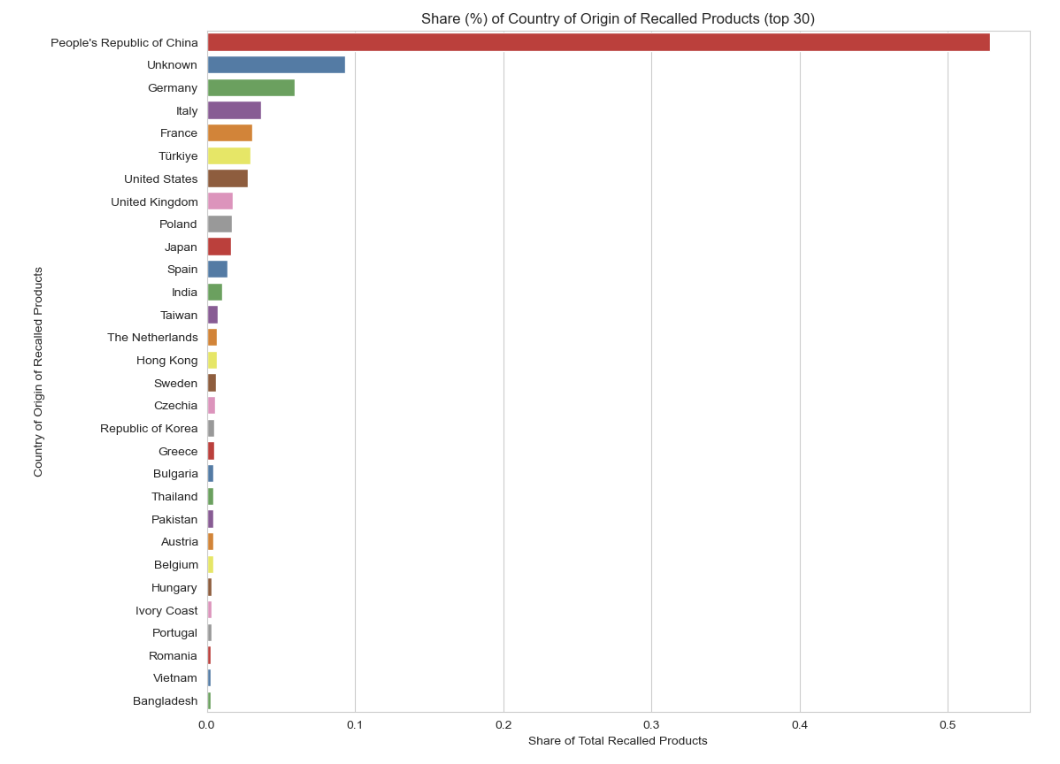

## Question 3b

We will now investigate the field ``Products were found and measures were taken also in``. This field refers to other countries that took measures as well after the reporting alerts. This field might contain multiple country names separated by ``,``, therefore in order to see which are the top-countries that have used the Safety Gate Alert system to identify unsafe products in their juristiction, we would need a new dataframe. Feel free to use another way.

Your new dataframe, should be indexed by the country name (based on the countries that have submitted alerts) and then feature 2 columns: the first one containing the total number of alerts that the country has submitted to Safety Gate and the second one containing the number of times this country took additional measures because of some alert.

Is there any relation between the number of alerts that a country is submitting and the number of cases that they have investigated because of the alerts? Comment on your findings.

In [116]:
#code for 3b goes here
new_df = df['Products were found and measures were taken also in']

new = df['Alert submitted by'].unique() # need a list containing all seperate countries, will iterate over later

# using q1 dataframes for this exercise

submitted_by = q1a_dfs['df_alert_submitted_by']

submitted_by = submitted_by.rename(columns = {'alert_submitted_by' : 'Country'})

submitted_by = submitted_by.drop(columns = 'frequency')

# need way to get all the countries in the other df -> store in list
newlist = []

# remove all nan values from the column we want
q3bdf = df['Products were found and measures were taken also in'].dropna()

q3bdf = q3bdf.to_list()

for idx, entry in enumerate(q3bdf): # iterate over first time
    q3bdf[idx] = q3bdf[idx].split(', ')
    idx += 1

for entry in q3bdf: # iterate over main list
    for country in entry: # iterate over subarrays
        newlist.append(country)
        
# get the counts of the individual countries in the newlist
country_df = pd.DataFrame(newlist).value_counts().reset_index(name = "Count (Products Found in)")

country_df = pd.DataFrame(country_df)

country_df = country_df.rename(columns = {0 : 'Country'})

# merge the 2 dataframes using the merge function
merged_df = pd.merge(submitted_by, country_df, on = 'Country', how = 'outer') # found the merge method using chatGPT

merged_df = merged_df.set_index('Country')

merged_df = merged_df.rename(columns = {'count' : 'count (submitted by)', 'Count (Products Found in)' : 'count (found in)'})

# print resulting df
merged_df

# compute the correlation between the two columns to see if there is anything interesting (there is not)
corr = merged_df.corr(method = 'pearson')

merged_df

count (submitted by)  \
Country                                                               
Germany                                                        5290   
Hungary                                                        3432   
France                                                         2493   
Spain                                                          2455   
United Kingdom                                                 1905   
Bulgaria                                                       1784   
Cyprus                                                         1594   
Italy                                                          1593   
Poland                                                         1563   
Finland                                                        1468   
Sweden                                                         1379   
Greece                                                         1119   
Czechia                                                        1079   
Slovakia                                                       1073   
The Netherlands                                                1026   
Lithuania                                                       942   
Portugal                                                        689   
Denmark                                                         579   
Ireland                                                         537   
Romania                                                         503   
Belgium                                                         469   
Latvia                                                          391   
Austria                                                         378   
Slovenia                                                        335   
Malta                                                           312   
Estonia                                                         309   
Norway                                                          258   
Luxembourg                                                      254   
Croatia                                                         237   
Iceland                                                          80   
Liechtenstein                                                     2   
United Kingdom in respect of Northern Ireland                     1   

                                               count (found in)  
Country                                                          
Germany                                                    1188  
Hungary                                                    1539  
France                                                     1371  
Spain                                                      1068  
United Kingdom                                              811  
Bulgaria                                                   1848  
Cyprus                                                      151  
Italy                                                       219  
Poland                                                     2389  
Finland                                                    2523  
Sweden                                                     3271  
Greece                                                     2105  
Czechia                                                     109  
Slovakia                                                   1729  
The Netherlands                                            2446  
Lithuania                                                   262  
Portugal                                                   2112  
Denmark                                                    2868  
Ireland                                                    2022  
Romania                                                     445  
Belgium                                                     313  
Latvia                                                      286  
Austria                                         

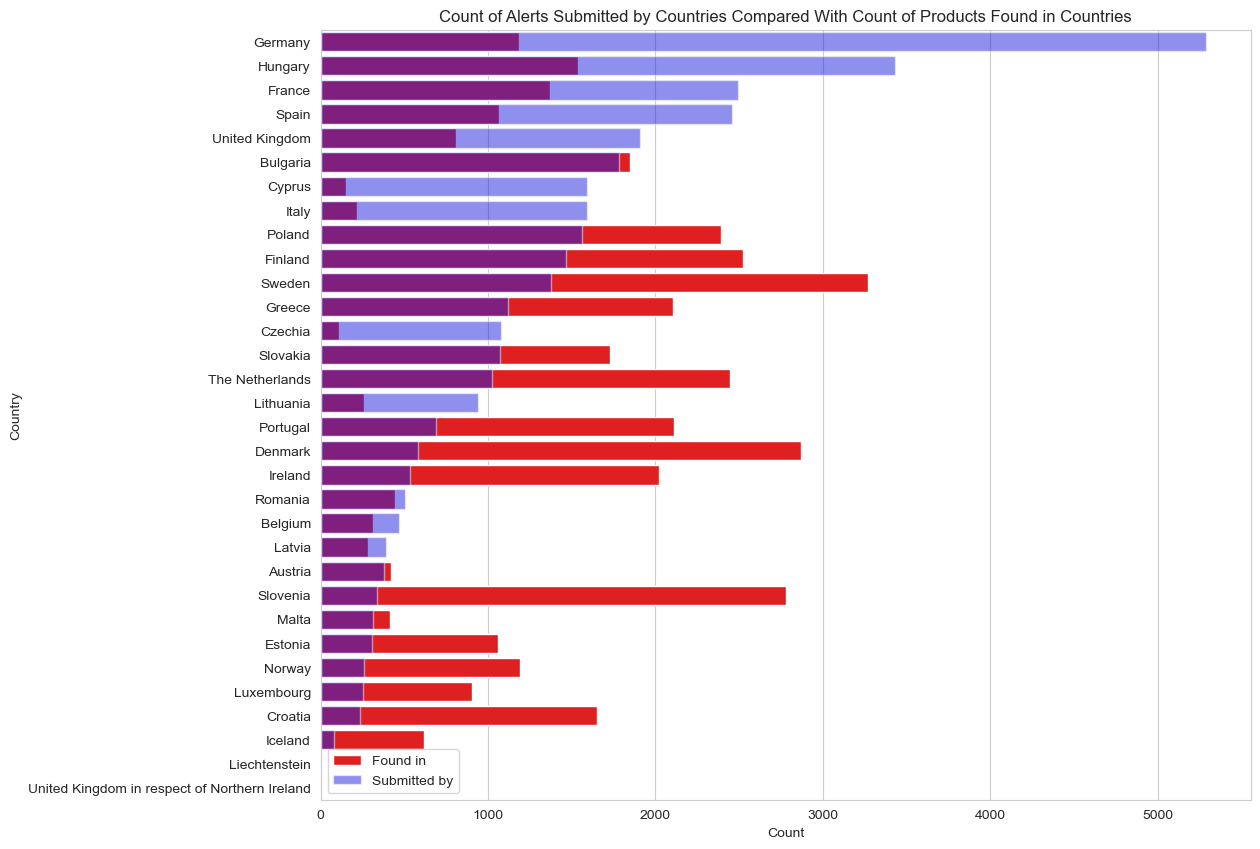

In [264]:
# warning, this plot looks very bad, I will just use the correlation matrix instead. 

plt.figure(figsize = (12, 10))

sns.barplot(y = merged_df.index, x = 'count (found in)', data = merged_df, alpha = 1,label = 'Found in', orient = 'h', color = 'r')
sns.barplot(y = merged_df.index, x = 'count (submitted by)', data = merged_df, alpha = 0.5, label = 'Submitted by', orient = 'h', color = 'b')

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Count of Alerts Submitted by Countries Compared With Count of Products Found in Countries')
plt.legend()
plt.show()

<Figure size 1200x1200 with 0 Axes>

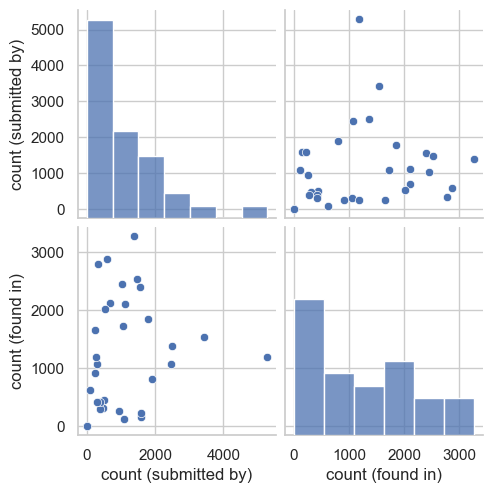

In [299]:
plt.figure(figsize = (12, 12)) # not working with pairwise plots ?

sns.pairplot(data = merged_df)

<Axes: >

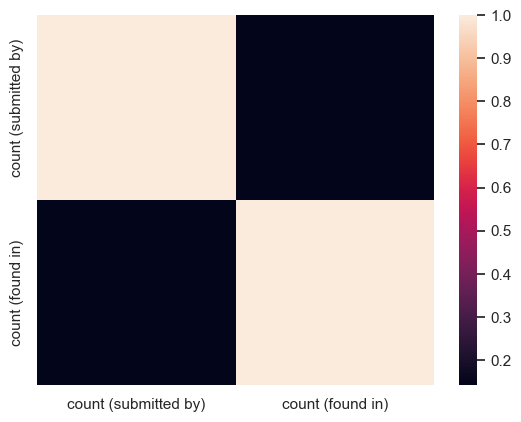

In [302]:
sns.heatmap(data = merged_df.corr()) # not all that useful given size of dataframe

In [117]:
corr

count (submitted by)  count (found in)
count (submitted by)              1.000000          0.142169
count (found in)                  0.142169          1.000000

***ANSWER Q3B***

I created the required dataframe by firstly using the existing dataframe from the function i wrote in the first exercise. I then altered it to get rid of the 'frequency' column. I then made a list with all the country names in the 'Measures also taken in' column of the df. I did this by splitting the strings, and simply appending everything to a new list. I then simply made a new dataframe out of that list, and included a value_count column.

Then I did an outer join on the two dataframes on the 'Country' column (using melt method), which gave me the final dataframe, where everything is ordered correctly. 

I also computed the correlation between the number of alerts submitted by each country and the number of times a country was mentioned in the ``Products were found and measures were taken also in`` column. There is a low correlation between both variables, as can be seen in the figure below.

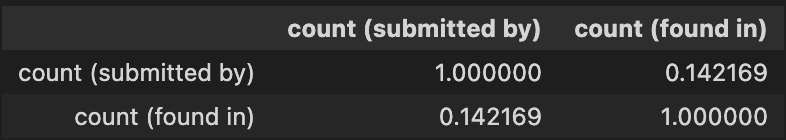

I have also plotted Scatter Plots for this dataframe, and as we can see below, there does not seem to be any meaningful correlation between the number of alerts submitted by country and the number of times recalled products were found in said country. 

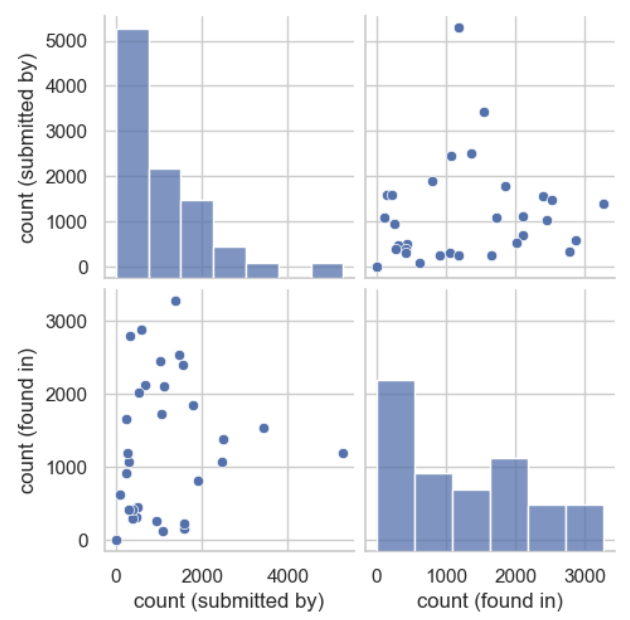

### Question 4a. Compute Something Interesting

Play with the data and try to compute something interesting about the data. Please try to use at least one of groupby, pivot, or merge (or all of the above).  

Please show your work in the cell below and describe in words what you found in the same cell. This question will be graded leniently but good solutions may be used to create future clinics.

#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): Uses a combination of pandas operations (such as groupby, pivot, merge) to answer a relevant question about the data. The text description provides a reasonable interpretation of the result.
- **Passing** (1-3 points): Computation is flawed or very simple. The text description is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No computation is performed, or a computation with completely wrong results.


***Put your code in one cell below and your explanation in a markdown cell below***

In [19]:
# I want to see the distribution of type of alert per country, looking at count and relative frequency

df_4a = df.groupby('Alert submitted by')['Type of alert'].value_counts() # use groupby to get count per country per alert type
df_4a = df_4a.rename('count').reset_index() # reset index for next calculation

df_4a_pivot_c = df_4a.pivot(index = 'Alert submitted by', columns = 'Type of alert', values = 'count') # pivot to make stacked bar plot

df_4a_b = df.groupby('Alert submitted by')['Counterfeit'].value_counts()
df_4a_b = df_4a_b.rename('count').reset_index()

df_4a_b_pivot_c = df_4a_b.pivot(index = 'Alert submitted by', columns = 'Counterfeit', values = 'count')

df_4_merge = pd.merge(df_4a_pivot_c, df_4a_b_pivot_c, how = 'outer', on = 'Alert submitted by')

df_4_merge.corr()

## INTERPRETATION OF RESULTS ##
# I have used a couple of methods to get the correlation matrix of 'counterfeit' vs 'type of alert'.
# We of course have to ignore all the correlation coefficients reported within the same categories, 
# this means we do not look at ->
#
# 'other risk levels' vs 'other types of alerts'
# 'other risk levels' vs 'serious risk'ArithmeticError
# 'other types of alerts' vs 'other risk levels'
# 'other types of alerts' vs 'serious risk'ArithmeticError
# 'serious risk' vs 'other risk levels'
# 'serious risk' vs 'other types of alerts'
#
# 'No' vs 'unknown'
# 'No' vs 'Yes'
# 'unknown' vs 'No'
# 'unknown' vs 'yes'
# 'yes' vs 'unknown'
# 'yes' vs 'no'
#
# With this being said, we can now look whether there seems to be a correlation between 
# the types of risks, and the counterfeit status of the product in question
# 
# We find that 'counterfeit' products seem to be more or less associated with 'other types of alerts'
# We can see that non-counterfeit goods are very strongly associated with 'serious risk' alerts
# We can see that products whose origin is unknown are also associated with 'serious risk' alerts

Other risk levels  Other types of alerts  Serious risk  \
Other risk levels               1.000000               0.224449      0.610329   
Other types of alerts           0.224449               1.000000      0.595675   
Serious risk                    0.610329               0.595675      1.000000   
No                              0.473266               0.671799      0.934684   
Unknown                         0.691828               0.332509      0.820570   
Yes                             0.111214               0.314324      0.133618   

                             No   Unknown       Yes  
Other risk levels      0.473266  0.691828  0.111214  
Other types of alerts  0.671799  0.332509  0.314324  
Serious risk           0.934684  0.820570  0.133618  
No                     1.000000  0.557742  0.113935  
Unknown                0.557742  1.000000  0.127387  
Yes                    0.113935  0.127387  1.000000

***EXPLANATION***

I have used the 'groupby' method on 'type of alert' and on 'counterfeit' along with the 'value_counts' method to obtain a count of all the occurences of the 3 possible values for each variable, per country.

I have then used the 'pivot' function on both of these new 'groupby' datasets, otherwise this calculation was not the one i wanted to get (what happens if you do not pivot both datasets before merging is that the merge function tends to not recognize that one of 'counterfeit count' or 'type of alert count' has different values per category, and the calculations are flawed)

Then I used the 'merge' function to obtain one single dataset, i used an outer merge. 

Finally, I computed the correlation between all of the columns of my new dataframe, ignoring the meaningless correlation coefficients, we can derive some mildly interesting insights here, as explained above in the code cell.

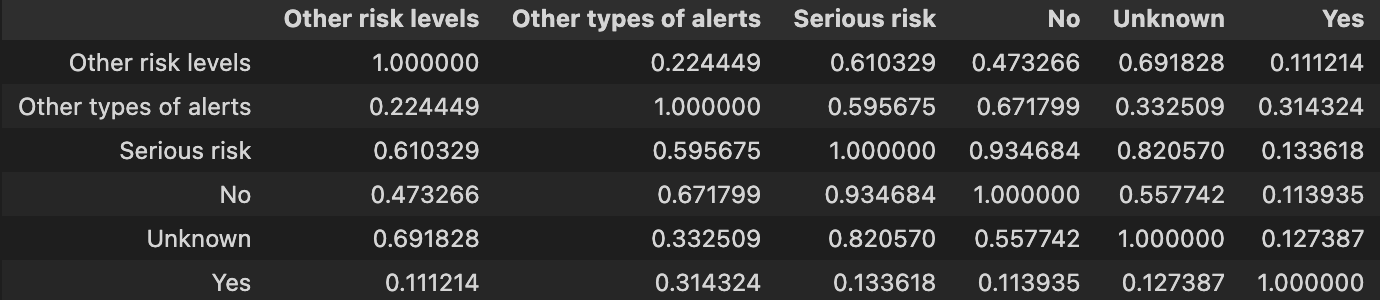

### Question 4b. Create some more cool visualizations!

Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found. This question will be graded leniently, but good solutions may be used to create future clinic problems. 


#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (1-3 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No chart is created, or a chart with completely wrong results.

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

***Put your code in one cell below and your explanation in a markdown cell below***

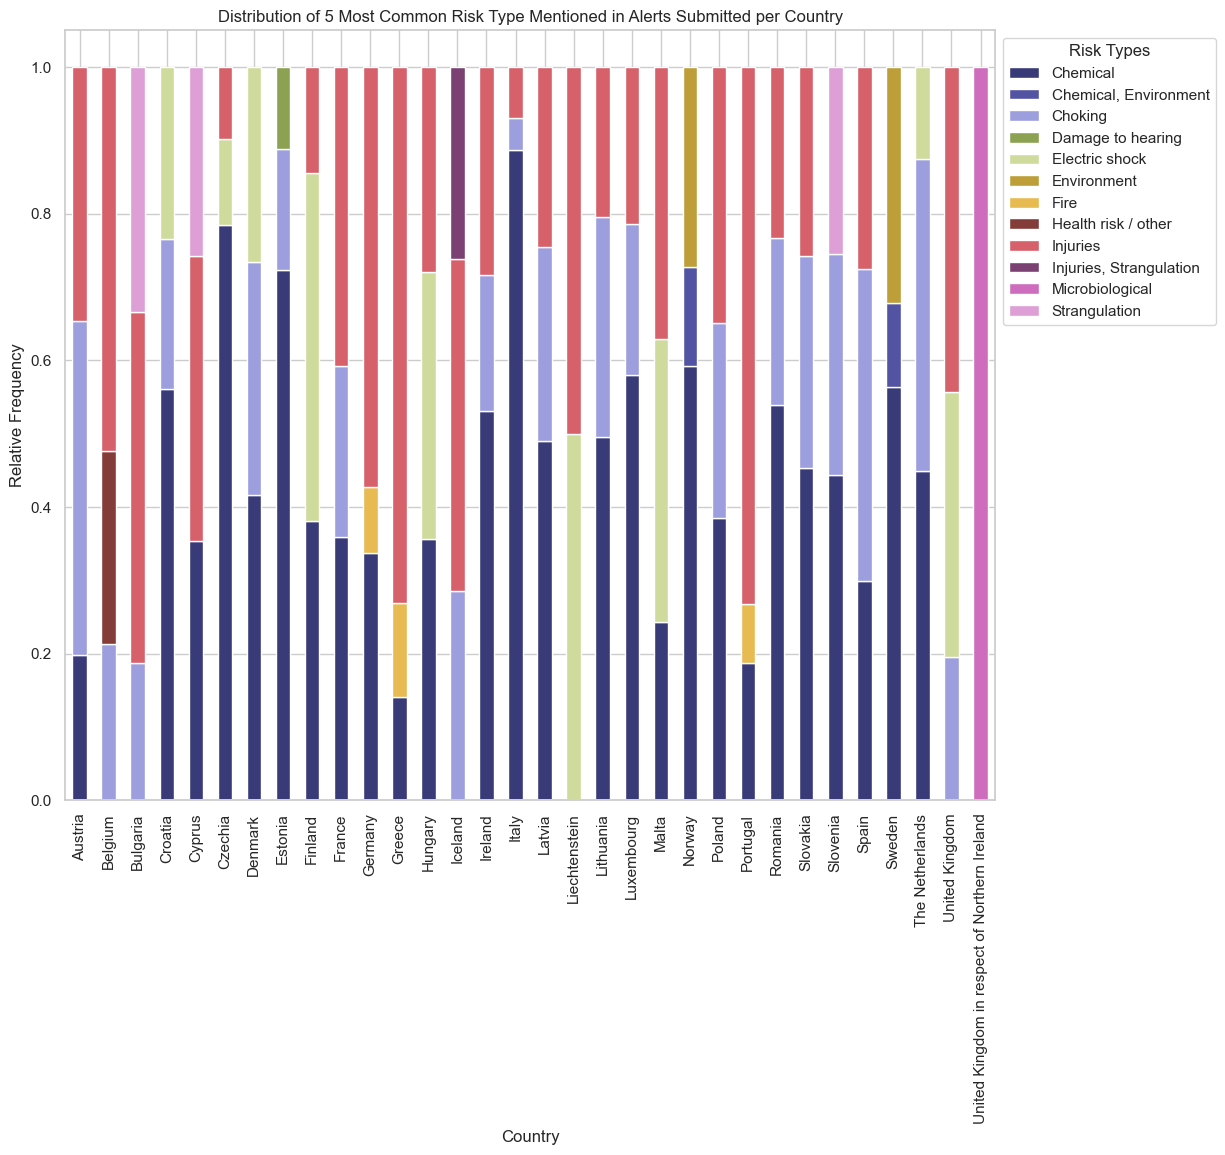

In [391]:
# stacked bar plot -> top 3 risk types per country #

df_4b = df.groupby("Alert submitted by")['Risk type'].value_counts()
df_4b = df_4b.rename('count').reset_index()
df_4b = df_4b.groupby('Alert submitted by').head(3)
df_4b['freq'] = df_4b.groupby('Alert submitted by')['count'].transform(lambda x : x / x.sum())
df_4b = df_4b.pivot(index = 'Alert submitted by', columns = 'Risk type', values = 'freq')
df_4b.plot(kind = 'bar', stacked = True, colormap = 'tab20b', figsize = (12, 10))

plt.title("Distribution of 5 Most Common Risk Type Mentioned in Alerts Submitted per Country")
plt.xlabel("Country")
plt.ylabel("Relative Frequency")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Risk Types') # moves legend outside of main plot, prevents obstructing the bars

***TOP 3 RISK TYPE PER COUNTRY***

We can observe that the "Chemical" type of risk is the most common across all countries, if we count all the years together.

Injuries and Choking, Electric Shock, are close seconds and thirds depending on the country, for most countries. 

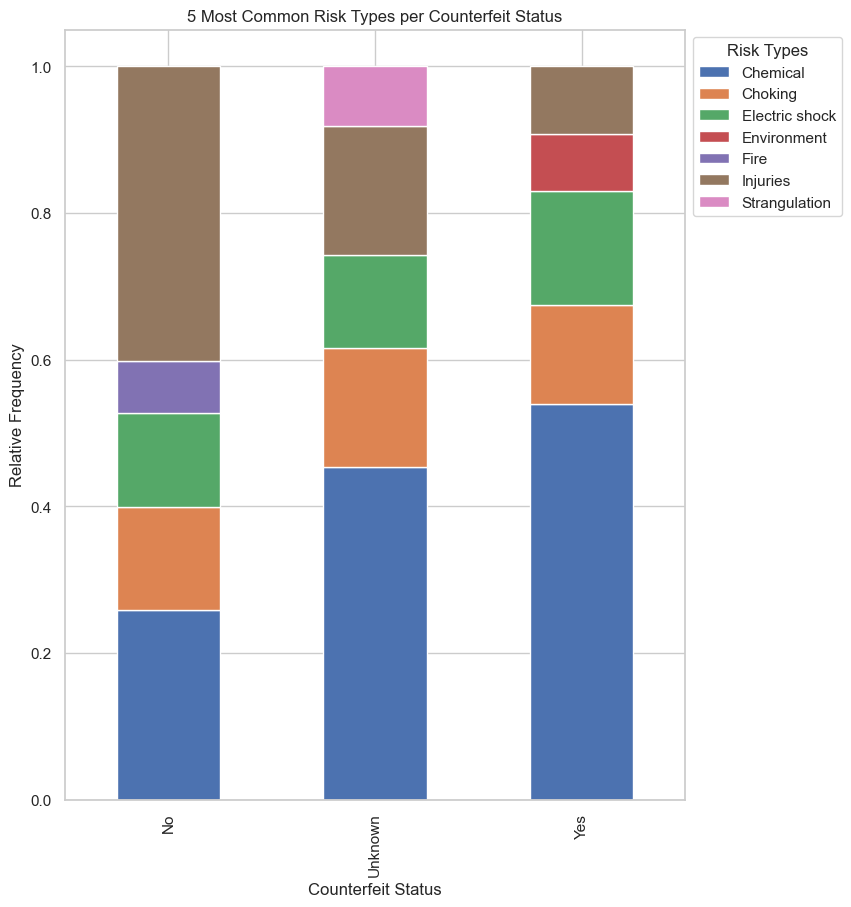

In [424]:
# top 5 risk type per counterfeit status #

df_4b_2 = df.groupby('Counterfeit')['Risk type'].value_counts()
df_4b_2 = df_4b_2.rename('count').reset_index()
df_4b_2 = df_4b_2.groupby('Counterfeit').head(5) # get top 5 risks
df_4b_2['freq'] = df_4b_2.groupby('Counterfeit')['count'].transform(lambda x : x / x.sum()) # get freq
df_4b_2['freq'] = df_4b_2.groupby('Counterfeit')['freq'].transform(lambda x : x / x.sum()) # normalize as we only take top 5
df_4b_2 = df_4b_2.pivot(index = 'Counterfeit', columns = 'Risk type', values = 'freq')
df_4b_2.plot(kind = 'bar', stacked = True, figsize = (8, 10))

plt.title("5 Most Common Risk Types per Counterfeit Status")
plt.xlabel("Counterfeit Status")
plt.ylabel("Relative Frequency")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Risk Types') # moves legend outside of main plot, prevents obstructing the bars

In [ ]:
# 

***TOP 5 RISK TYPE PER COUNTERFEIT STATUS***

The bar plot above shows that the leading type of risk for counterfeit, and products of unknown status is "Chemical". For non-counterfeit goods, the leading type of risk was "Injuries".

For non-counterfeit products, the second most common type of risk is "Chemical". For goods of unknown status, the second most common risk is "Injuries". For Counterfeit products, it is "Electric Shock"

The third most common type of risk for the non-counterfeit goods is "Choking". For products of unknown status, it is also "Choking", and for counterfeit goods, it is the same. 

---
## 5: Recommendations for the EC & Concluding Remarks

### Question 5a

Considering the insights derived from your analysis, what recommendations would you propose to the European Commission regarding enhancements to the Safety Gate portal/database? Each recommendation should be underpinned by the findings derived from the examination of plots, statistics and observations. Take into account aspects such as missing data, variable distributions (e.g., evaluating the utility of variables with limited values), and potential enhancements in data representation or transformation.

### Question 5b

In a concise summary of your analysis outcomes, address the implications for relevant stakeholders. How does this analysis impact: (a) consumers, (b) companies and (c) regulatory authorities, such as national consumer protection agencies or the European Commission itself? Additionally, consider potential misuse of the dataset (and any subsequent analyses) by individuals or entities. If you identify such risks, propose ways to mitigate them.

***ANSWER TO 5A -> RECOMMENDATIONS FOR EC***

__MISSING DATA__

In the dataframe used throughout this clinic, I have analyzed thoroughly the distribtution of each variable, and often found that some columns are missing thousands (often more than 10%) of their entries. For some entries and variables, this is very easy to explain, anything which involved counterfeit goods for example is unlikely to be ever recalled or linked to a webpage. For some other variables, such as "packaging description", however, it is quite surprising to find almost 30 thousand missing entries. In fact, 10 variables have over 10 thousand missing entries, and 6 variables have over 20 thousand missing values. My concern is, are these missing entries due to the nature of the products themselves (for example, it makes sense to have many missing entries for "name"), or are could some of these be a lack of dilligence from the EC/countries submitting alerts to the EC? 

For some of the variables in the dataset such as "name", having almost 30 thousand missing values, I do not believe there much use in including such a column in the dataframe. After all, "name" is expected to be unique to each entry in the dataframe, therefore there is nothing I can do to extract any insights from such columns. 

My recommendation to the EC would be to delete columns which have unique entries and many missing values, with the exception of some variables such as "alert number", because this one is very useful.

__RELEVANCE OF VARIABLES__

Mentioned above already, some variables like "name" are not very useful, as they are unique and no little to no insights can really be derived from them.

Other variables include but are not limited to: "barcode", "type/number of model". These are simply not useful variable when looking at them from a practical point of view, because no insight can be derived from them. 

If we combine the observations above with the fact that there are many missing entries in the "company recall page" column (34360), having fields like the barcode and the serial number of a product does not seem very useful in this context. 

Fields such as "packaging type" are also not very interesting. 

My recommendation regarding the relevance of variables is to simply get rid of "useless" variables, because no one can derive any insights from them.

__FORMAT OF CERTAIN COLUMNS__

This is a very big problem. Based on my calculations and visualizations, I have determined that a few variables, such as "risk", "compulsory measures", "voluntary measures", "packaging description" (there are likely more variables where this is the case), have issues in formatting. What I observed is that many entries in these columns are either very similar, or identical, but due to mistakes and oversights regarding formatting, they are identified by Pandas as different types of entries altogether when this should not be the case. For example, some entries include a period at the end of the word, and some do not, resulting in them being identified seperately, and causing problems in the analysis due to the size of the dataframe.

Secondly, I have noticed that entries for columns such as "type of risk" and "Products were found and measures were taken also in" contain entries which are very similar, almost "overlapping" with other entries. For example, in "type of risk", there are entries such as "Electric Shock, Fire", "Fire" and "Electric Shock". This causes issues with my analysis, and is a blatant oversight and lack of dilligence from the EC. This can be very easily eliminated by simply counting the recalled or bad products once for each risk type category they may belong to. 

Thirdly, I am also concerned about the way URLS found in "company recall page" are submitted into the database of the EC. It is unacceptable for some entries to be "mercedes-benz.de" and others to be "Mercedes-Benz.de\t\t\t\t\t". It takes a minute at most to correct the URLs to get rid of HTML tags, and I would recommend the EC to be more strict about the way this is done in their database.

My recommendation to the EC regarding the format of some variables would be to simply take a few more minutes checking the format of the entries, instead of just allowing countries to be "sloppy" while submitting entries to the database, this would give me access to many more insights I cannot get while this is the case. 


***ANSWER TO 5b -> IMPLICATIONS FOR OTHER PARTIES***

__IMPACT ON CONSUMERS__

When looking at the countries where dangerous products were most commonly found, we can see that a few countries "find" way more dangerous products than others. Now, this is most likely a case of the degree to which the relevant authorities pay attention to dangerous goods, for example, Sweden, with a population of 10.5 Million, appears over 3000 times in the "products were also found in" columns, and Czechia, which also has a population of 10.5M, only appears 109 times. It is highly unlikely that this really means Czechia imports no dangerous products, and Sweden does. 

The impact on consumers is therefore important, because this potentially highlights countries where authorities are not careful with regards to dangerous products, which puts consumers at risk. 

__IMPACT ON COMPANIES__

In a similar fasion as discussed in the previous question, we can observe that there is a bias in fields such as "company recall page". In this field in particular, many entries (34360) are missing, and only a few companies actually seem to ever issue recalls for their products if they are deemed to be dangerous or unsafe. What we can observe is that many of the companies which show up in this field are related to the motorized vehicle industry, such as Mercedes-Benz, for example. What this implies is that although Mercedes is one of the companies which seems to be very strict about recalling bad products, they show up in unusually high numbers on this list, which could lead to uninformed people believing they are the biggest producer of dangerous products, when in fact they simply have an immense share of the market and actively recall bad products. 

Many companies may suffer from this, should this data be misused, Mercedes isn't the only one in this case.

__IMPACT ON REGULATORY AUTHORITIES__

This dataset was obtained from the EC. It is therefore surprising (or is it?) to see that the quality of the dataset is quite poor. Many entries are missing, many fields are irrelevant, and many fields contain formatting issues which could be sorted by being more dilligent and strict regarding the entries which are submitted into the dataset. This does paint a poor picture of the EC; more strictness should be expected from them regarding their datasets.

Additionally, the data could hurt a few countries' regulatory authorities: given the lack of alerts submitted by many countries such as Czechia, to only cite one (there are many more), I can say with almost certainty that certain countries are simply not paying attention to what kinds of products circulate in their economy, and do not prioritize the safety of their citizens in that regard. This could hurt them should this information be made more accessible to everyone.

__POTENTIAL MISUSE OF THE DATA__

Given the abnormal number of missing entries in certain columns, sometimes giving rise to biases in the analysis of said columns, it is easy to imagine how people could manipulate the data to their own benefit. Simply looking at the "company recall page", we can see names like Mercedes pop up very often. It would be easy to just ommit the fact that 34360 entries out of some 35000 entries are missing, and say that Mercedes is the biggest offender regarding the production of unsafe products, for example.